## Predicting Energy consumption in NYC

A Data-Driven Approach to Sustainable Urban Living"

Datasets: https://data.cityofnewyork.us/Environment/NYC-Building-Energy-and-Water-Data-Disclosure-for-/5zyy-y8am/about_data / https://www.nyc.gov/site/planning/data-maps/open-data/dwn-pluto-mappluto.page


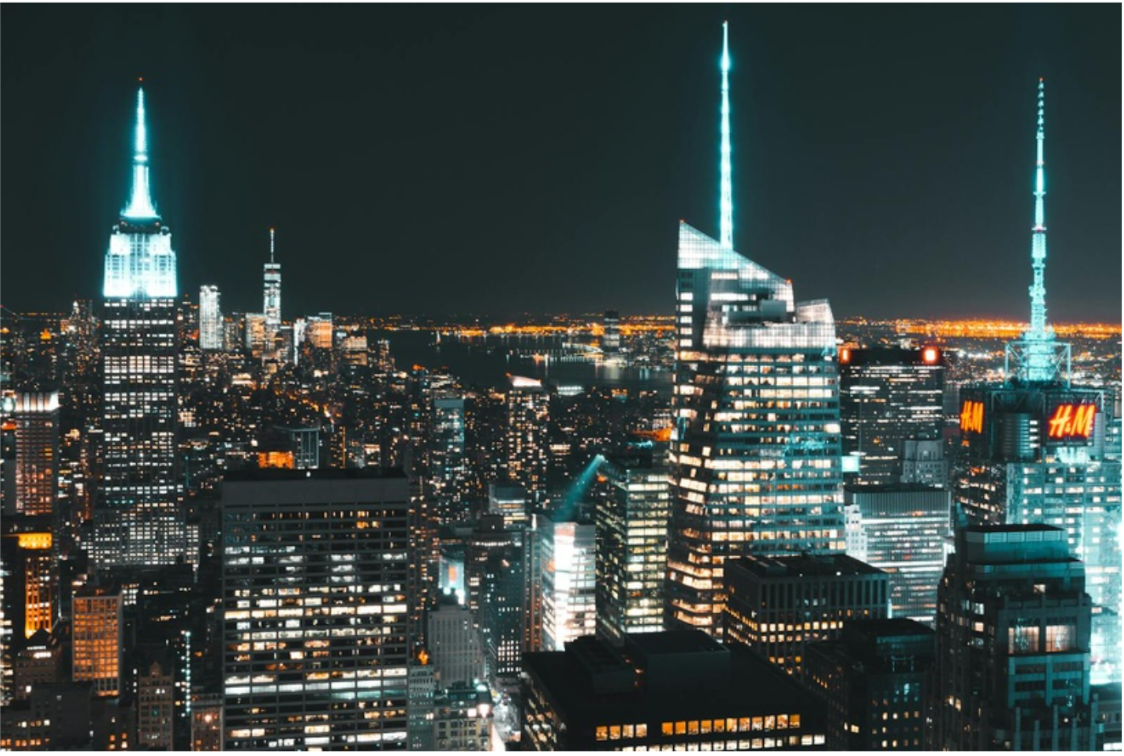

## Business Understanding:
This project centers on the analysis and prediction of energy consumption in buildings across New York City, with a focus on driving positive outcomes for various stakeholders. The intended audience includes urban planners, environmentalists, the New York State Government, real estate investors, and policymakers. The goal is to provide insights that can influence energy-efficient building practices, shape policies supporting sustainable living, and contribute to cost savings for individuals and businesses. By predicting energy efficiency trends, the project aims to guide strategic decisions that not only optimize resource usage and reduce environmental impact but also support economic development and enhance the overall resilience of the community


## Data Understanding

This project leverages two key datasets: The NYC Building Energy for Local Law 84 (2023-Present), providing information on energy usage for buildings exceeding 50,000 square feet, including details such as year built, address, and occupancy. Additionally, the Primary Land Use Tax Lot Output (PLUTO™) data file offers comprehensive land use and geographic data, featuring columns like address, number of buildings, number of floors, etc. The selection of these datasets are based on their extensive information content, with PLUTO™ comprising over 800,000 rows and 92 columns, and the NYC dataset containing 30,000 rows and 254 columns. Directly sourced from official websites, these datasets encompass diverse features, including building energy consumption, water usage, land use, zoning, building characteristics, and geographic information. Our study stands out for its unique approach to integrating these datasets, potentially offering valuable insights into the field of urban energy efficiency analysis.


In [77]:
# Importing the needed libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV


In [78]:
#Reading PLUTO dataset
df1=pd.read_csv('data/pluto_23v3_1.csv')

/var/folders/py/3n00xtn91530fm9swm7lpdx80000gp/T/ipykernel_19624/1530827924.py:2: DtypeWarning: Columns (21,22,24,25,26,28,65,66,81,88) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('data/pluto_23v3_1.csv')


In [79]:
#checkiing the shape()
df1.shape

(858598, 92)

In [80]:
#checking the first 5 rows
df1.head()

borough  block  lot     cd    bct2020     bctcb2020  ct2010  cb2010  \
0      BX   5595   94  210.0  2013200.0  2.013201e+10   132.0  5008.0   
1      BX   5593   98  210.0  2013200.0  2.013201e+10   132.0  5006.0   
2      BX   5593  106  210.0  2013200.0  2.013201e+10   132.0  5006.0   
3      BX   5593  103  210.0  2013200.0  2.013201e+10   132.0  5006.0   
4      BX   5593  101  210.0  2013200.0  2.013201e+10   132.0  5006.0   

   schooldist  council  ...  appbbl appdate  plutomapid  firm07_flag  \
0         8.0     13.0  ...     NaN     NaN           1          NaN   
1         8.0     13.0  ...     NaN     NaN           1          NaN   
2         8.0     13.0  ...     NaN     NaN           1          NaN   
3         8.0     13.0  ...     NaN     NaN           1          1.0   
4         8.0     13.0  ...     NaN     NaN           1          1.0   

   pfirm15_flag  version  dcpedited   latitude  longitude notes  
0           NaN   23v3.1        NaN  40.814154 -73.820936   NaN  
1           1.0   23v3.1        NaN  40.814429 -73.819393   NaN  
2           1.0   23v3.1        NaN  40.814896 -73.819695   NaN  
3           1.0   23v3.1        NaN  40.814706 -73.819580   NaN  
4           1.0   23v3.1        NaN  40.814577 -73.819504   NaN  

[5 rows x 92 columns]

In [81]:
#checking the columns info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858598 entries, 0 to 858597
Data columns (total 92 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   borough               858598 non-null  object 
 1   block                 858598 non-null  int64  
 2   lot                   858598 non-null  int64  
 3   cd                    857655 non-null  float64
 4   bct2020               857601 non-null  float64
 5   bctcb2020             857601 non-null  float64
 6   ct2010                857601 non-null  float64
 7   cb2010                857601 non-null  float64
 8   schooldist            856929 non-null  float64
 9   council               857513 non-null  float64
 10  zipcode               856914 non-null  float64
 11  firecomp              856910 non-null  object 
 12  policeprct            856924 non-null  float64
 13  healthcenterdistrict  856924 non-null  float64
 14  healtharea            856924 non-null  float64
 15  

In [82]:
#Convert the data set into lower case
df1 = df1.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df1

# Convert column names to lowercase
df1.columns = [col.lower() for col in df1.columns]
df1.head()

/var/folders/py/3n00xtn91530fm9swm7lpdx80000gp/T/ipykernel_19624/2928579480.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df1 = df1.applymap(lambda x: x.lower() if isinstance(x, str) else x)


borough  block  lot     cd    bct2020     bctcb2020  ct2010  cb2010  \
0      bx   5595   94  210.0  2013200.0  2.013201e+10   132.0  5008.0   
1      bx   5593   98  210.0  2013200.0  2.013201e+10   132.0  5006.0   
2      bx   5593  106  210.0  2013200.0  2.013201e+10   132.0  5006.0   
3      bx   5593  103  210.0  2013200.0  2.013201e+10   132.0  5006.0   
4      bx   5593  101  210.0  2013200.0  2.013201e+10   132.0  5006.0   

   schooldist  council  ...  appbbl appdate  plutomapid  firm07_flag  \
0         8.0     13.0  ...     NaN     NaN           1          NaN   
1         8.0     13.0  ...     NaN     NaN           1          NaN   
2         8.0     13.0  ...     NaN     NaN           1          NaN   
3         8.0     13.0  ...     NaN     NaN           1          1.0   
4         8.0     13.0  ...     NaN     NaN           1          1.0   

   pfirm15_flag  version  dcpedited   latitude  longitude notes  
0           NaN   23v3.1        NaN  40.814154 -73.820936   NaN  
1           1.0   23v3.1        NaN  40.814429 -73.819393   NaN  
2           1.0   23v3.1        NaN  40.814896 -73.819695   NaN  
3           1.0   23v3.1        NaN  40.814706 -73.819580   NaN  
4           1.0   23v3.1        NaN  40.814577 -73.819504   NaN  

[5 rows x 92 columns]

In [83]:
df1['address'][250:300]

250     272 emerson avenue
251      271 hosmer avenue
252     276 emerson avenue
253    257 robinson avenue
254    252 robinson avenue
255     274 emerson avenue
256      269 hosmer avenue
257    255 robinson avenue
258      258 hosmer avenue
259       240 davis avenue
260    239 buttrick avenue
261    228 buttrick avenue
262      200 hosmer avenue
263     2607 schurz avenue
264     2609 schurz avenue
265    2612 harding avenue
266       253 davis avenue
267    201 robinson avenue
268    2608 harding avenue
269    2618 harding avenue
270    250 robinson avenue
271    254 robinson avenue
272    256 robinson avenue
273       245 davis avenue
274       249 davis avenue
275       231 davis avenue
276    2629 harding avenue
277     2602 schurz avenue
278      2916 miles avenue
279      2910 miles avenue
280      2922 miles avenue
281      2920 miles avenue
282      2926 miles avenue
283       287 logan avenue
284      166 revere avenue
285      164 revere avenue
286      176 revere avenue
2

In [84]:
df1.isna().sum()

borough           0
block             0
lot               0
cd              943
bct2020         997
              ...  
version           0
dcpedited    816447
latitude       1049
longitude      1049
notes        858598
Length: 92, dtype: int64

In [85]:
df1.columns

Index(['borough', 'block', 'lot', 'cd', 'bct2020', 'bctcb2020', 'ct2010',
       'cb2010', 'schooldist', 'council', 'zipcode', 'firecomp', 'policeprct',
       'healthcenterdistrict', 'healtharea', 'sanitboro', 'sanitdistrict',
       'sanitsub', 'address', 'zonedist1', 'zonedist2', 'zonedist3',
       'zonedist4', 'overlay1', 'overlay2', 'spdist1', 'spdist2', 'spdist3',
       'ltdheight', 'splitzone', 'bldgclass', 'landuse', 'easements',
       'ownertype', 'ownername', 'lotarea', 'bldgarea', 'comarea', 'resarea',
       'officearea', 'retailarea', 'garagearea', 'strgearea', 'factryarea',
       'otherarea', 'areasource', 'numbldgs', 'numfloors', 'unitsres',
       'unitstotal', 'lotfront', 'lotdepth', 'bldgfront', 'bldgdepth', 'ext',
       'proxcode', 'irrlotcode', 'lottype', 'bsmtcode', 'assessland',
       'assesstot', 'exempttot', 'yearbuilt', 'yearalter1', 'yearalter2',
       'histdist', 'landmark', 'builtfar', 'residfar', 'commfar', 'facilfar',
       'borocode', 'bbl', 'cond

## Reading df2

In [86]:
#reading NYC Building energy
df2=pd.read_csv('data/NYC_Building_Energy_and_Water_Data_Disclosure_for_Local_Law_84__2023-Present__20240129.csv')

/var/folders/py/3n00xtn91530fm9swm7lpdx80000gp/T/ipykernel_19624/3123082929.py:2: DtypeWarning: Columns (10,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df2=pd.read_csv('data/NYC_Building_Energy_and_Water_Data_Disclosure_for_Local_Law_84__2023-Present__20240129.csv')


In [87]:
#checking the shape
df2.shape

(30485, 254)

In [88]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30485 entries, 0 to 30484
Columns: 254 entries, Report Year to Neighborhood Tabulation Area (NTA) (2020)
dtypes: bool(2), float64(9), int64(10), object(233)
memory usage: 58.7+ MB


In [89]:
#Reading df2.info()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Display DataFrame information in a structured format
print(f"<class 'pandas.core.frame.DataFrame'>")
print(f"RangeIndex: {df2.shape[0]} entries, 0 to {df2.shape[0] - 1}")
print("Data columns (total %d columns):" % df2.shape[1])

# Loop through columns and display information for each
for i, column in enumerate(df2.columns):
    print(f" #   {i:2d} {column:20s} {df2[column].count():>13d} non-null  {df2[column].dtype.name:<8s}")

# Display memory usage information
print(f"dtypes: {df2.dtypes.value_counts().to_string()}")
print(f"memory usage: {df2.memory_usage(deep=True).sum() / (1024**2):.1f}+ MB")

# Reset display options to default values
pd.reset_option('display.max_columns')
pd.reset_option('display.max_rows')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30485 entries, 0 to 30484
Data columns (total 254 columns):
 #    0 Report Year                  30485 non-null  int64   
 #    1 Property ID                  30485 non-null  int64   
 #    2 Property Name                30485 non-null  object  
 #    3 Parent Property ID           30485 non-null  object  
 #    4 Parent Property Name         30485 non-null  object  
 #    5 Year Ending                  30485 non-null  object  
 #    6 NYC Borough, Block and Lot (BBL)         30485 non-null  object  
 #    7 NYC Building Identification Number (BIN)         30485 non-null  object  
 #    8 Address 1                    30485 non-null  object  
 #    9 City                         30485 non-null  object  
 #   10 Postal Code                  30485 non-null  object  
 #   11 Primary Property Type - Self Selected         30485 non-null  object  
 #   12 Primary Property Type - Portfolio Manager-Calculated         30485 non-null  object  
 # 

In [90]:
df2.head()

Report Year  Property ID              Property Name  \
0         2022      6414946         58-01 Grand Avenue   
1         2022      9793770  1870 Pelham Parkway South   
2         2022     10177418           Central Building   
3         2022     13511507       215 East 99th Street   
4         2022     14009907            23-25 31 Street   

                    Parent Property ID                 Parent Property Name  \
0  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
1  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
2  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
3  Not Applicable: Standalone Property  Not Applicable: Standalone Property   
4  Not Applicable: Standalone Property  Not Applicable: Standalone Property   

  Year Ending NYC Borough, Block and Lot (BBL)  \
0  12/31/2022                       4026780001   
1  12/31/2022                       2042500026   
2  12/31/2022                       4157040040   
3  12/31/2022                       1016490009   
4  12/31/2022                       4008350027   

  NYC Building Identification Number (BIN)                  Address 1  \
0                                  4059918         58-01 Grand Avenue   
1                                  2047795  1870 Pelham Parkway South   
2                                  4300145              2011 Mott Ave   
3                                  1052383       215 East 99th Street   
4                                  4017180            23-25 31 Street   

           City  ... Number of Active IT Meters  Report Generation Date  \
0        Queens  ...                          0  04/25/2023 11:01:44 AM   
1         Bronx  ...                          0  03/11/2023 02:00:50 PM   
2  Far Rockaway  ...                          0  04/14/2023 03:47:19 PM   
3      New York  ...                          0  03/12/2023 03:54:23 PM   
4        Queens  ...                          0  04/28/2023 02:22:48 PM   

   Report Submission Date    Borough   Latitude  Longitude  Community Board  \
0  04/25/2023 11:02:08 AM     QUEENS  40.719667 -73.911197            405.0   
1  03/11/2023 02:01:08 PM      BRONX  40.855488 -73.830726            210.0   
2  04/14/2023 03:47:37 PM     QUEENS  40.604320 -73.753009            414.0   
3  03/12/2023 03:54:43 PM  MANHATTAN  40.786963 -73.947537            111.0   
4  04/28/2023 02:23:30 PM     QUEENS  40.773768 -73.913573            401.0   

  Council District Census Tract (2020)  \
0             30.0               531.0   
1             13.0               300.0   
2             31.0            100803.0   
3              8.0               164.0   
4             22.0               115.0   

  Neighborhood Tabulation Area (NTA) (2020)  
0                                    QN0501  
1                                    BX1003  
2                                    QN1401  
3                                    MN1101  
4                                    QN0101  

[5 rows x 254 columns]

In [91]:
# Convert column names to lowercase
df2.columns = [col.lower() for col in df2.columns]

#Convert the data set into lower case
df2 = df2.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df2.head()

/var/folders/py/3n00xtn91530fm9swm7lpdx80000gp/T/ipykernel_19624/1536913436.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df2 = df2.applymap(lambda x: x.lower() if isinstance(x, str) else x)


report year  property id              property name  \
0         2022      6414946         58-01 grand avenue   
1         2022      9793770  1870 pelham parkway south   
2         2022     10177418           central building   
3         2022     13511507       215 east 99th street   
4         2022     14009907            23-25 31 street   

                    parent property id                 parent property name  \
0  not applicable: standalone property  not applicable: standalone property   
1  not applicable: standalone property  not applicable: standalone property   
2  not applicable: standalone property  not applicable: standalone property   
3  not applicable: standalone property  not applicable: standalone property   
4  not applicable: standalone property  not applicable: standalone property   

  year ending nyc borough, block and lot (bbl)  \
0  12/31/2022                       4026780001   
1  12/31/2022                       2042500026   
2  12/31/2022                       4157040040   
3  12/31/2022                       1016490009   
4  12/31/2022                       4008350027   

  nyc building identification number (bin)                  address 1  \
0                                  4059918         58-01 grand avenue   
1                                  2047795  1870 pelham parkway south   
2                                  4300145              2011 mott ave   
3                                  1052383       215 east 99th street   
4                                  4017180            23-25 31 street   

           city  ... number of active it meters  report generation date  \
0        queens  ...                          0  04/25/2023 11:01:44 am   
1         bronx  ...                          0  03/11/2023 02:00:50 pm   
2  far rockaway  ...                          0  04/14/2023 03:47:19 pm   
3      new york  ...                          0  03/12/2023 03:54:23 pm   
4        queens  ...                          0  04/28/2023 02:22:48 pm   

   report submission date    borough   latitude  longitude  community board  \
0  04/25/2023 11:02:08 am     queens  40.719667 -73.911197            405.0   
1  03/11/2023 02:01:08 pm      bronx  40.855488 -73.830726            210.0   
2  04/14/2023 03:47:37 pm     queens  40.604320 -73.753009            414.0   
3  03/12/2023 03:54:43 pm  manhattan  40.786963 -73.947537            111.0   
4  04/28/2023 02:23:30 pm     queens  40.773768 -73.913573            401.0   

  council district census tract (2020)  \
0             30.0               531.0   
1             13.0               300.0   
2             31.0            100803.0   
3              8.0               164.0   
4             22.0               115.0   

  neighborhood tabulation area (nta) (2020)  
0                                    qn0501  
1                                    bx1003  
2                                    qn1401  
3                                    mn1101  
4                                    qn0101  

[5 rows x 254 columns]

In [92]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30485 entries, 0 to 30484
Columns: 254 entries, report year to neighborhood tabulation area (nta) (2020)
dtypes: bool(2), float64(9), int64(10), object(233)
memory usage: 58.7+ MB


In [93]:
list(df2.columns)

['report year',
 'property id',
 'property name',
 'parent property id',
 'parent property name',
 'year ending',
 'nyc borough, block and lot (bbl)',
 'nyc building identification number (bin)',
 'address 1',
 'city',
 'postal code',
 'primary property type - self selected',
 'primary property type - portfolio manager-calculated',
 'national median reference property type',
 'list of all property use types (gfa) (ft²)',
 'largest property use type',
 'largest property use type - gross floor area (ft²)',
 '2nd largest property use type',
 '2nd largest property use type - gross floor area (ft²)',
 '3rd largest property use type',
 '3rd largest property use type - gross floor area (ft²)',
 'year built',
 'construction status',
 'number of buildings',
 'occupancy',
 'metered areas (energy)',
 'metered areas (water)',
 'energy star score',
 'national median energy star score',
 'target energy star score',
 'reason(s) for no score',
 'energy star certification - year(s) certified (score)',


## Merging using address 

In [94]:
df1[['address','zmcode']]

address zmcode
0         2737 schurz avenue    NaN
1       182 brinsmade avenue    NaN
2       196 brinsmade avenue    NaN
3       190 brinsmade avenue    NaN
4       186 brinsmade avenue    NaN
...                      ...    ...
858593      18 kissam avenue    NaN
858594         jewett avenue    NaN
858595     40 holcomb avenue    NaN
858596      holden boulevard    NaN
858597  342 amsterdam avenue    NaN

[858598 rows x 2 columns]

In [95]:
# Manual Cleaning of df1 address
df1['address'] = df1['address'].str.replace('-', '')  # Remove '-'
df1['address'] = df1['address'].str.split('/').str[0].str.strip() # Remove '/'

In [96]:
df2[['address 1','postal code']]

address 1 postal code
0             58-01 grand avenue       11378
1      1870 pelham parkway south       10461
2                  2011 mott ave       11691
3           215 east 99th street       10029
4                23-25 31 street       11105
...                          ...         ...
30480           163 front street       10038
30481            15 lisbon place       10306
30482              113-25 14 ave       11356
30483             450 zerega ave       10473
30484       347-349 rider avenue       10451

[30485 rows x 2 columns]

In [97]:
# Manual Cleaning of df2 address
df2['address 1'] = df2['address 1'].str.replace('-', '')  # Remove '-'
df2['address 1'] = df2['address 1'].str.split('/').str[0].str.strip()  # Remove '/'

In [98]:
#Merging both datasets
df_m = pd.merge(df1, df2, left_on='address', right_on='address 1')
df_m.head()

borough_x  block  lot     cd    bct2020     bctcb2020  ct2010  cb2010  \
0        bx   3852    1  210.0  2009600.0  2.009600e+10    96.0  2001.0   
1        bx   3852    1  210.0  2009600.0  2.009600e+10    96.0  2001.0   
2        qn   1206   42  402.0  4025500.0  4.025500e+10   255.0  1009.0   
3        qn   1206   43  402.0  4025500.0  4.025500e+10   255.0  1009.0   
4        qn   1222   55  402.0  4026300.0  4.026300e+10   263.0  1008.0   

   schooldist  council  ...  number of active it meters  \
0        11.0     13.0  ...                           0   
1        11.0     13.0  ...                           0   
2        30.0     26.0  ...                           0   
3        30.0     26.0  ...                           0   
4        30.0     26.0  ...                           0   

   report generation date  report submission date  borough_y  latitude_y  \
0  04/24/2023 09:44:32 pm  04/24/2023 09:45:09 pm      bronx   40.837532   
1  03/29/2023 03:02:28 pm  03/29/2023 03:04:15 pm      bronx   40.837532   
2  06/26/2023 08:20:57 am  06/26/2023 08:21:49 am        NaN         NaN   
3  06/26/2023 08:20:57 am  06/26/2023 08:21:49 am        NaN         NaN   
4  06/26/2023 08:20:57 am  06/26/2023 08:21:49 am        NaN         NaN   

   longitude_y  community board council district census tract (2020)  \
0   -73.842448            210.0             18.0                96.0   
1   -73.842448            210.0             18.0                96.0   
2          NaN              NaN              NaN                 NaN   
3          NaN              NaN              NaN                 NaN   
4          NaN              NaN              NaN                 NaN   

  neighborhood tabulation area (nta) (2020)  
0                                    bx1001  
1                                    bx1001  
2                                       NaN  
3                                       NaN  
4                                       NaN  

[5 rows x 346 columns]

In [99]:
df_m.to_csv('df_a_m.csv', index=False)

## EDA

In [100]:
#reading the merged dataset
df_a_m = pd.read_csv('df_a_m.csv')

/var/folders/py/3n00xtn91530fm9swm7lpdx80000gp/T/ipykernel_19624/3186178953.py:2: DtypeWarning: Columns (26,28,102) have mixed types. Specify dtype option on import or set low_memory=False.
  df_a_m = pd.read_csv('df_a_m.csv')


In [101]:
df_a_m.shape #(9513, 346)

(9723, 346)

In [102]:
df_a_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Columns: 346 entries, borough_x to neighborhood tabulation area (nta) (2020)
dtypes: bool(2), float64(70), int64(14), object(260)
memory usage: 25.5+ MB


In [103]:
#checking for duplicates in property id
df_a_m['property id'].duplicated().value_counts()

property id
False    9212
True      511
Name: count, dtype: int64

In [104]:
#Dropping for duplicates in property id
df_a_m = df_a_m.drop_duplicates(subset='property id')

In [105]:
df_a_m.shape #(9030, 346)

(9212, 346)

In [106]:
list(df_a_m.columns)

['borough_x',
 'block',
 'lot',
 'cd',
 'bct2020',
 'bctcb2020',
 'ct2010',
 'cb2010',
 'schooldist',
 'council',
 'zipcode',
 'firecomp',
 'policeprct',
 'healthcenterdistrict',
 'healtharea',
 'sanitboro',
 'sanitdistrict',
 'sanitsub',
 'address',
 'zonedist1',
 'zonedist2',
 'zonedist3',
 'zonedist4',
 'overlay1',
 'overlay2',
 'spdist1',
 'spdist2',
 'spdist3',
 'ltdheight',
 'splitzone',
 'bldgclass',
 'landuse',
 'easements',
 'ownertype',
 'ownername',
 'lotarea',
 'bldgarea',
 'comarea',
 'resarea',
 'officearea',
 'retailarea',
 'garagearea',
 'strgearea',
 'factryarea',
 'otherarea',
 'areasource',
 'numbldgs',
 'numfloors',
 'unitsres',
 'unitstotal',
 'lotfront',
 'lotdepth',
 'bldgfront',
 'bldgdepth',
 'ext',
 'proxcode',
 'irrlotcode',
 'lottype',
 'bsmtcode',
 'assessland',
 'assesstot',
 'exempttot',
 'yearbuilt',
 'yearalter1',
 'yearalter2',
 'histdist',
 'landmark',
 'builtfar',
 'residfar',
 'commfar',
 'facilfar',
 'borocode',
 'bbl',
 'condono',
 'tract2010',
 '

In [107]:
df_a_m.duplicated().value_counts()

False    9212
Name: count, dtype: int64

In [108]:
df_a_m[['postal code','zmcode']]

postal code zmcode
0          10461    NaN
2          11101    NaN
18         11106    NaN
19         11102    NaN
20         11102    NaN
...          ...    ...
9718       10027    NaN
9719       10027    NaN
9720       10452    NaN
9721       10452    NaN
9722       11235    NaN

[9212 rows x 2 columns]

In [109]:
df_a_m['zmcode'].isna().sum()

8811

In [110]:
df_a_m['postal code'].unique()

array(['10461', '11101', '11106', '11102', '10025', '11205', '10011',
       '10010', '11418', '11215', '10001', '11103', '11104', '11211',
       '11377', '11435', '11434', '11433', '11232', '10027', '11418-1751',
       '10016', '10017', '10006', '10024', '10455', '11228', '10463',
       '11209', '11217', '11218', '10018', '11238', '11432', '11368',
       '11373', '11423', '10475', '10028', '10023', '11229', '10022',
       '10456', '10301', '11374', '11365', '11436', '11355', '11354',
       '11427', '11249', '10034', '10014', '10013', '10002', '10012',
       '10004', '10003', '10459', '10470', '10309', '10038', '11201',
       '11237', '10453', '11235', '10040', '11109', '10452', '10473',
       '10036', '10019', '10165', '10065', '10021', '10172', '10167',
       '10171', '10466', '10075', '10170', '100196852', '10033', '10302',
       '10177', '10173', '10465', '10128', '10035', '10026', '10023-3244',
       '10029', '10031', '11206', '10037', '10454', '10009', '10472',
      

In [111]:
# Normalize the 'postal code' column to the first 5 characters ( from values '10012-4411')
df_a_m['postal code'] = df_a_m['postal code'].str[:5]

# Verify the update
df_a_m['postal code'].unique()

array(['10461', '11101', '11106', '11102', '10025', '11205', '10011',
       '10010', '11418', '11215', '10001', '11103', '11104', '11211',
       '11377', '11435', '11434', '11433', '11232', '10027', '10016',
       '10017', '10006', '10024', '10455', '11228', '10463', '11209',
       '11217', '11218', '10018', '11238', '11432', '11368', '11373',
       '11423', '10475', '10028', '10023', '11229', '10022', '10456',
       '10301', '11374', '11365', '11436', '11355', '11354', '11427',
       '11249', '10034', '10014', '10013', '10002', '10012', '10004',
       '10003', '10459', '10470', '10309', '10038', '11201', '11237',
       '10453', '11235', '10040', '11109', '10452', '10473', '10036',
       '10019', '10165', '10065', '10021', '10172', '10167', '10171',
       '10466', '10075', '10170', '10033', '10302', '10177', '10173',
       '10465', '10128', '10035', '10026', '10029', '10031', '11206',
       '10037', '10454', '10009', '10472', '10007', '10451', '10474',
       '10306', '104

In [112]:
df_a_m['postal code'].isna().sum()

3988

In [113]:
df_a_m['address'].isna().sum()

0

In [114]:
df_a_m['address'][50:100]

81           190 garfield place
82                565 85 street
83     8523 ft hamilton parkway
84                8302 6 avenue
85            235 lincoln place
86           100 sterling place
87            209 lincoln place
88                8701 4 avenue
89                 566 7 avenue
91     8831 ft hamilton parkway
92               225 park place
93               230 park place
94           535 carlton avenue
95     9031 ft hamilton parkway
96           117 sterling place
97               145 park place
98            491 bergen street
99            402 marine avenue
100                593 6 avenue
101                469 7 avenue
103             9038 170 street
104             10828 38 avenue
105              9807 38 avenue
106             16633 89 avenue
107         8810 whitney avenue
108         9031 whitney avenue
109       4111 elbertson street
110          4165 forley street
111               8655 broadway
112       20215 hillside avenue
113       20507 hillside avenue
114     

In [212]:
# Check for NaN values in the 'postal code' column
df_a_m['postal code'].isna().sum()


3988

In [116]:
#pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [217]:
df_a_m['postal code_u']

0       None
2       None
18      None
19      None
20      None
        ... 
9718    None
9719    None
9720    None
9721    None
9722    None
Name: postal code_u, Length: 9212, dtype: object

## Potential features

In [117]:
""""
# Selecting features_baselines 
Features=  'borough_x', 'lotarea', 'bldgarea', 'numbldgs', 'numfloors','unitstotal','assessland',
                                 'postal code','largest property use type - gross floor area (ft²)',
                                  'year built', 'construction status', 'number of buildings', 'occupancy',
                                 'property gfa - self-reported (ft²)',  'water use (all water sources) (kgal)',
                                 'total (location-based) ghg emissions (metric tons co2e)'    ]
                                 
Best Mode  === Linear Regression MODEL SUMMARY==
Mean Squared Error for Energy Efficiency model: 0.03378337559569033
R-Squared 0.968041818682259
Mean MSE:-cross val  2745772250922531.5
Model accuracy 0.9674890593752579


""";

In [118]:
""""
# Selecting features_Model 1
Features=  'borough_x', 'lotarea', 'bldgarea', 'numbldgs', 'numfloors','unitstotal','assessland',
                                 'postal code','largest property use type - gross floor area (ft²)',
                                  'year built', 'construction status', 'number of buildings', 'occupancy',
                                 'property gfa - self-reported (ft²)',    ]

Removing: 'water use (all water sources) (kgal)', 'total (location-based) ghg emissions (metric tons co2e)' 


Best Mode  === Linear Regression MODEL SUMMARY==
Mean Squared Error for Energy Efficiency model: 0.03378337559569033
R-Squared 0.968041818682259
Mean MSE:-cross val  2745772250922531.5
Model accuracy 0.9674890593752579



""";

# Selecting features_new models 2
features_energy_efficiency = [ 'borough_x', 'lotarea', 'bldgarea', 'numbldgs', 'numfloors','unitstotal','assessland',
                                 'postal code','largest property use type - gross floor area (ft²)',
                                  'year built', 'construction status', 'number of buildings', 'occupancy',
                                 'property gfa - self-reported (ft²)',  'water use (all water sources) (kgal)'
                              
                              ]
#adding these 2 features 'primary property type - self selected', 'total (location-based) ghg emissions (metric tons co2e)'

Best Model: XGBosst

Mean Squared Error Training: 0.15807137907384472
R-squared  Training: 0.8505259791945967
Mean Squared average:/ Crossval 0.2054178490014703

# Selecting features_new models 3
features_energy_efficiency = [ 'borough_x', 'lotarea', 'bldgarea', 'numbldgs', 'numfloors','unitstotal','assessland',
                                 'postal code','largest property use type - gross floor area (ft²)',
                                  'year built', 'construction status', 'number of buildings', 'occupancy',
                                 'property gfa - self-reported (ft²)',  'water use (all water sources) (kgal)',
                                 'total (location-based) ghg emissions (metric tons co2e)'
                              
                              ]
#removing 'primary property type - self selected', 

In [220]:
# Selecting features_new models 
features_energy_efficiency = [ 'borough_x', 'lotarea', 'bldgarea', 'numbldgs', 'numfloors','unitstotal','assessland',
                                 'postal code','largest property use type - gross floor area (ft²)',
                                  'year built', 'construction status', 'number of buildings', 'occupancy',
                                 'property gfa - self-reported (ft²)', 
                              
                              ]
#removing 'primary property type - self selected',
#added: 'metered areas (energy)','national median energy star score'
#removed'bldgclass', 'bldgarea',  'assessland','assesstot',


In [221]:
# For Energy Efficiency Analysis

target_energy_efficiency = 'site energy use (kbtu)' #'site eui (kbtu/ft²)

# Creating the subset DataFrame for Energy Efficiency
df_e = df_a_m[features_energy_efficiency + [target_energy_efficiency]]

In [222]:
df_e.shape

(9212, 15)

In [223]:
#checking the nulls 
df_e.isna().sum()

borough_x                                                0
lotarea                                                  1
bldgarea                                                 0
numbldgs                                                 1
numfloors                                              169
unitstotal                                               1
assessland                                               0
postal code                                           3988
largest property use type - gross floor area (ft²)       0
year built                                               0
construction status                                      0
number of buildings                                      0
occupancy                                                0
property gfa - self-reported (ft²)                       0
site energy use (kbtu)                                   0
dtype: int64

In [224]:
#Dropping the nulls
df_e=df_e.dropna()
df_e.shape

(5091, 15)

In [225]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5091 entries, 0 to 9721
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   borough_x                                           5091 non-null   object 
 1   lotarea                                             5091 non-null   float64
 2   bldgarea                                            5091 non-null   float64
 3   numbldgs                                            5091 non-null   float64
 4   numfloors                                           5091 non-null   float64
 5   unitstotal                                          5091 non-null   float64
 6   assessland                                          5091 non-null   float64
 7   postal code                                         5091 non-null   object 
 8   largest property use type - gross floor area (ft²)  5091 non-null   float64
 9   ye

In [226]:
df_e.head()

borough_x   lotarea  bldgarea  numbldgs  numfloors  unitstotal  assessland  \
0         bx  316180.0  153816.0       1.0        2.0         3.0   2133000.0   
18        qn    9000.0   35568.0       1.0        6.0        48.0    364500.0   
19        qn    9313.0   29480.0       1.0        4.0        38.0    183150.0   
20        qn   30900.0   94250.0       1.0        6.0       125.0    599413.0   
22        mn  102811.0  324023.0       1.0       19.0       414.0   3074434.0   

   postal code  largest property use type - gross floor area (ft²)  \
0        10461                                           153816.0    
18       11106                                            38532.0    
19       11102                                            29480.0    
20       11102                                            99600.0    
22       10025                                           424552.0    

    year built construction status  number of buildings  occupancy  \
0         1981            existing                    1        100   
18        1940            existing                    1        100   
19        1937            existing                    1         95   
20        1963            existing                    1        100   
22        1961            existing                    1        100   

    property gfa - self-reported (ft²) site energy use (kbtu)  
0                             153816.0              7996944.3  
18                             38532.0               739486.5  
19                             29480.0              3213156.2  
20                             99600.0              4647605.3  
22                            426042.0             27710965.3

#convert object to numeric 
object_columns = df_e.select_dtypes(include=['object']).columns
print(object_columns)
# Convert each object column to numeric
for col in object_columns:
    df_e[col] = pd.to_numeric(df_e[col], errors='coerce')

In [227]:
#no include 'borough_x','primary property type - self selected','construction status ',

object_columns = df_e.select_dtypes(include=['object']).columns
print(object_columns)

# List of columns to exclude
exclude_columns = ['borough_x', 'construction status','postal code'] #'primary property type - self selected', 
# Convert each object column to float, setting errors to NaN
for col in object_columns:
    if col not in exclude_columns:
        try:
            df_e[col] = df_e[col].astype(float)
        except ValueError:
            df_e[col] = pd.to_numeric(df_e[col], errors='coerce')

Index(['borough_x', 'postal code', 'construction status',
       'site energy use (kbtu)'],
      dtype='object')


In [228]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5091 entries, 0 to 9721
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   borough_x                                           5091 non-null   object 
 1   lotarea                                             5091 non-null   float64
 2   bldgarea                                            5091 non-null   float64
 3   numbldgs                                            5091 non-null   float64
 4   numfloors                                           5091 non-null   float64
 5   unitstotal                                          5091 non-null   float64
 6   assessland                                          5091 non-null   float64
 7   postal code                                         5091 non-null   object 
 8   largest property use type - gross floor area (ft²)  5091 non-null   float64
 9   ye

In [229]:
#df_e

In [230]:
df_e[target_energy_efficiency].isna().value_counts()

site energy use (kbtu)
False    4989
True      102
Name: count, dtype: int64

In [231]:
df_e = df_e[df_e[target_energy_efficiency].notna()]
df_e.shape

(4989, 15)

In [232]:
df_e.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4989 entries, 0 to 9721
Data columns (total 15 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   borough_x                                           4989 non-null   object 
 1   lotarea                                             4989 non-null   float64
 2   bldgarea                                            4989 non-null   float64
 3   numbldgs                                            4989 non-null   float64
 4   numfloors                                           4989 non-null   float64
 5   unitstotal                                          4989 non-null   float64
 6   assessland                                          4989 non-null   float64
 7   postal code                                         4989 non-null   object 
 8   largest property use type - gross floor area (ft²)  4989 non-null   float64
 9   ye

In [233]:
df_e[target_energy_efficiency].isna().value_counts()

site energy use (kbtu)
False    4989
Name: count, dtype: int64

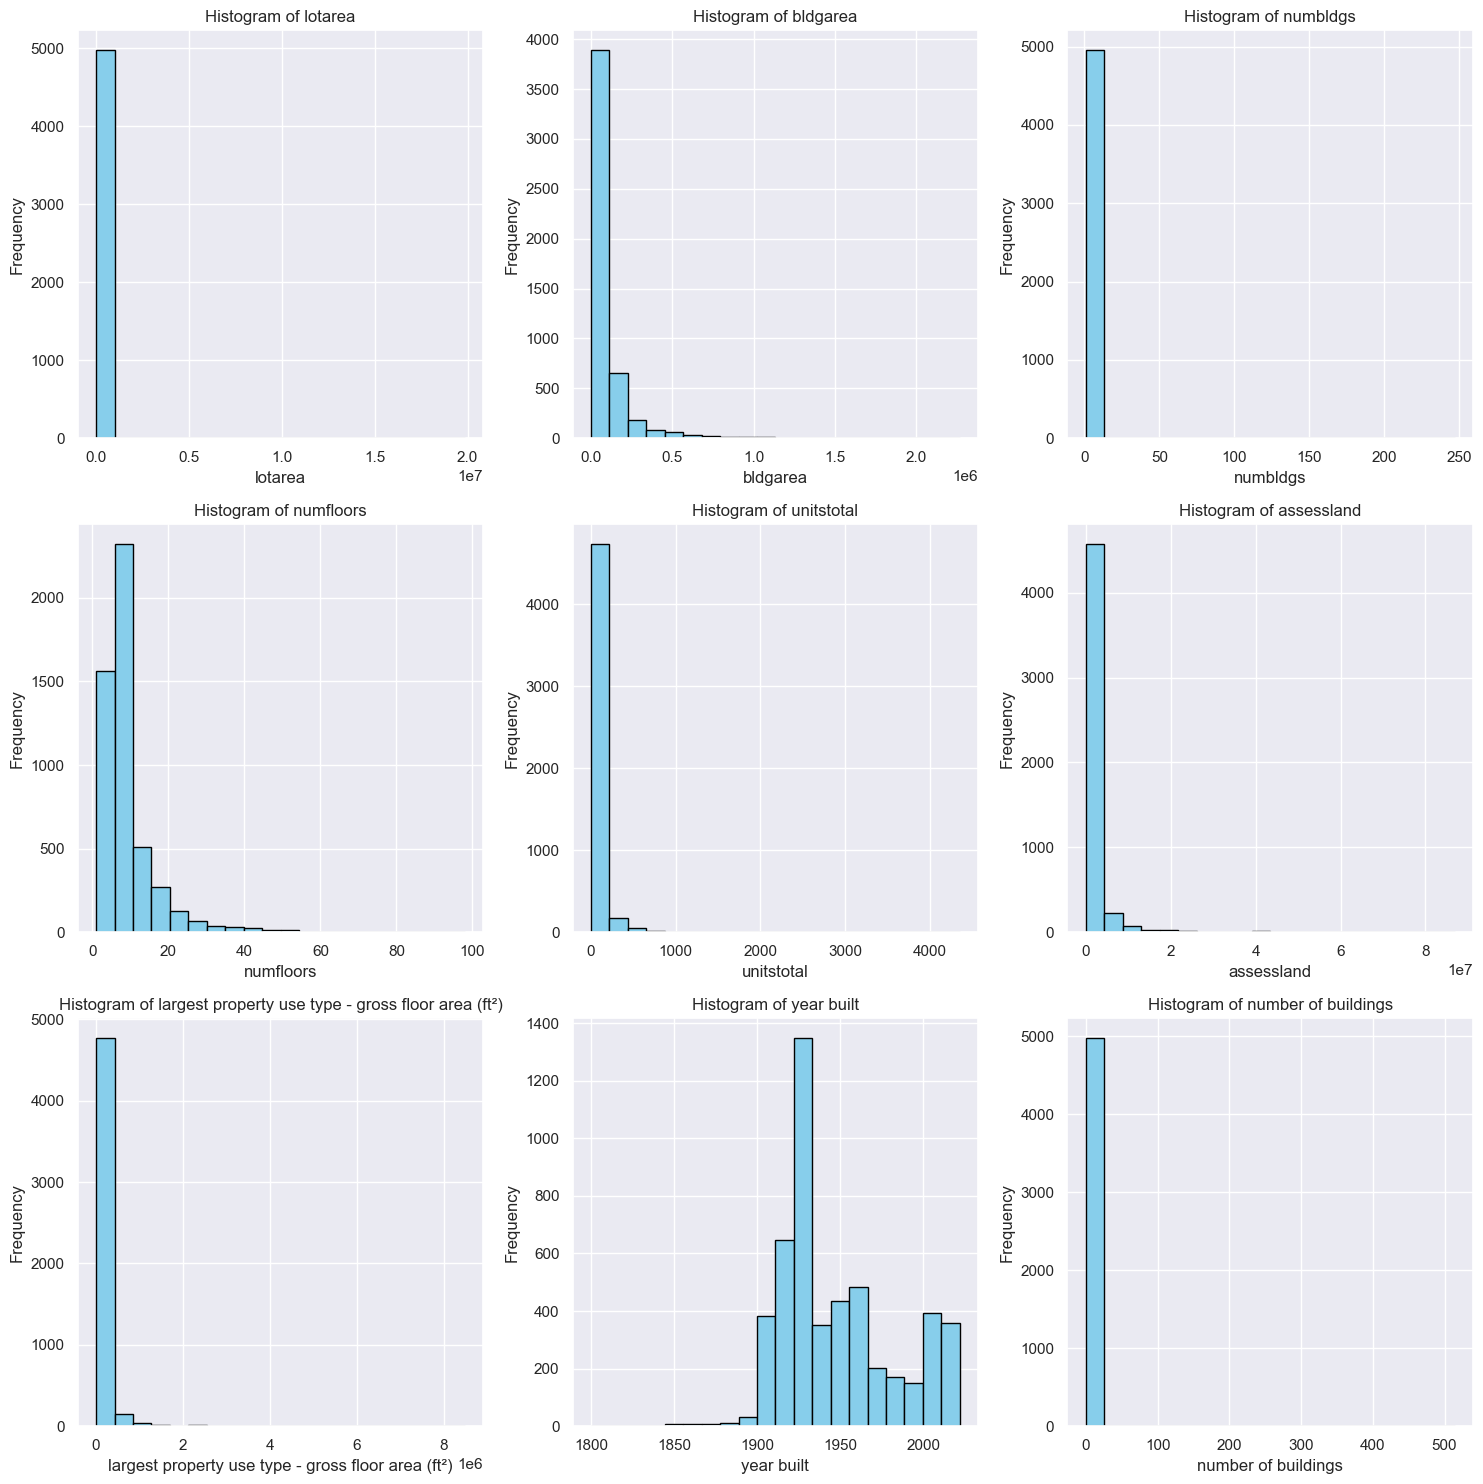

In [234]:

# Number of rows and columns in the grid
n_rows, n_cols = 3, 3

# Create a figure and a set of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
axes = axes.flatten()  

# Plotting histograms for each numeric column
for i, column in enumerate(df_e.select_dtypes(include=np.number).columns):
    if i >= n_rows * n_cols:  
        break
    axes[i].hist(df_e[column], bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for ax in axes[i+1:]:
    ax.remove()

plt.tight_layout()
plt.show()

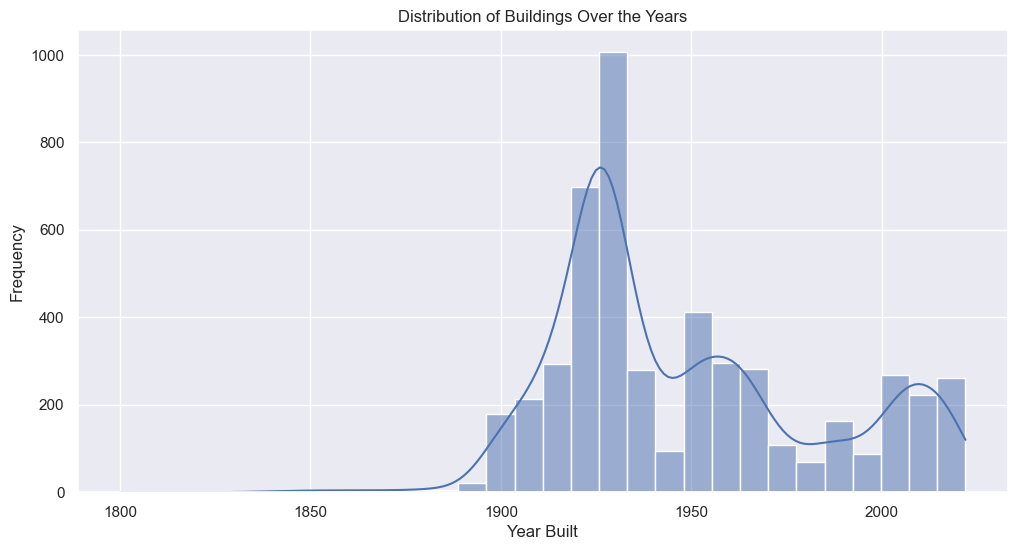

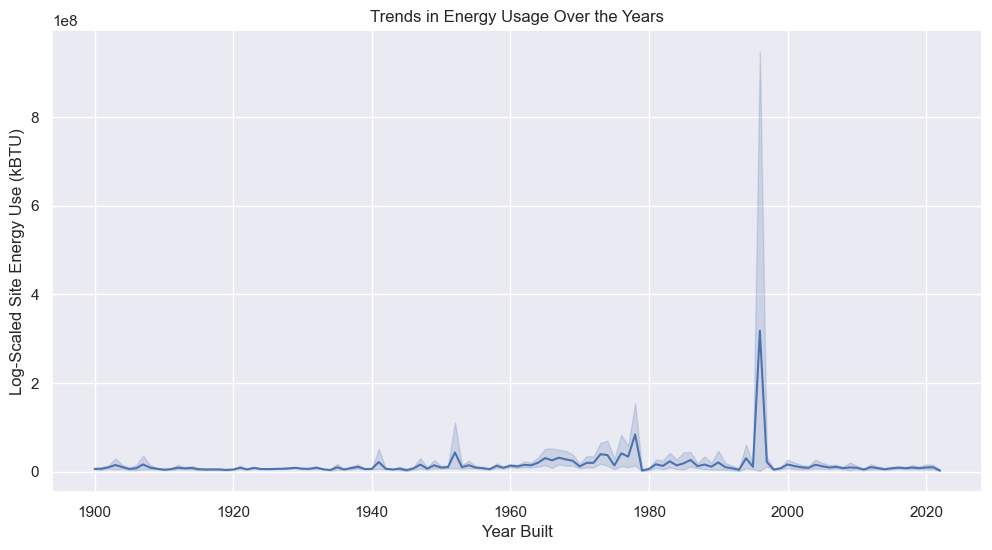

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of buildings over the years
plt.figure(figsize=(12, 6))
sns.histplot(df_e['year built'], bins=30, kde=True)
plt.title('Distribution of Buildings Over the Years')
plt.xlabel('Year Built')
plt.ylabel('Frequency')
plt.show()

df_e['year built'] = df_e['year built'].apply(lambda x: max(1900, x))

# Trends in energy usage over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='year built', y='site energy use (kbtu)', data=df_e)
plt.title('Trends in Energy Usage Over the Years')
plt.xlabel('Year Built')
plt.ylabel('Log-Scaled Site Energy Use (kBTU)')
plt.show()

In [236]:
list(df_a_m.columns)

['borough_x',
 'block',
 'lot',
 'cd',
 'bct2020',
 'bctcb2020',
 'ct2010',
 'cb2010',
 'schooldist',
 'council',
 'zipcode',
 'firecomp',
 'policeprct',
 'healthcenterdistrict',
 'healtharea',
 'sanitboro',
 'sanitdistrict',
 'sanitsub',
 'address',
 'zonedist1',
 'zonedist2',
 'zonedist3',
 'zonedist4',
 'overlay1',
 'overlay2',
 'spdist1',
 'spdist2',
 'spdist3',
 'ltdheight',
 'splitzone',
 'bldgclass',
 'landuse',
 'easements',
 'ownertype',
 'ownername',
 'lotarea',
 'bldgarea',
 'comarea',
 'resarea',
 'officearea',
 'retailarea',
 'garagearea',
 'strgearea',
 'factryarea',
 'otherarea',
 'areasource',
 'numbldgs',
 'numfloors',
 'unitsres',
 'unitstotal',
 'lotfront',
 'lotdepth',
 'bldgfront',
 'bldgdepth',
 'ext',
 'proxcode',
 'irrlotcode',
 'lottype',
 'bsmtcode',
 'assessland',
 'assesstot',
 'exempttot',
 'yearbuilt',
 'yearalter1',
 'yearalter2',
 'histdist',
 'landmark',
 'builtfar',
 'residfar',
 'commfar',
 'facilfar',
 'borocode',
 'bbl',
 'condono',
 'tract2010',
 '

In [237]:
# lets drop the nan and the not vailable rows for kbtu/ft2
import numpy as np
df_e= df_e[~df_e[target_energy_efficiency].isin(['not available', np.nan])]
df_e.head()

borough_x   lotarea  bldgarea  numbldgs  numfloors  unitstotal  assessland  \
0         bx  316180.0  153816.0       1.0        2.0         3.0   2133000.0   
18        qn    9000.0   35568.0       1.0        6.0        48.0    364500.0   
19        qn    9313.0   29480.0       1.0        4.0        38.0    183150.0   
20        qn   30900.0   94250.0       1.0        6.0       125.0    599413.0   
22        mn  102811.0  324023.0       1.0       19.0       414.0   3074434.0   

   postal code  largest property use type - gross floor area (ft²)  \
0        10461                                           153816.0    
18       11106                                            38532.0    
19       11102                                            29480.0    
20       11102                                            99600.0    
22       10025                                           424552.0    

    year built construction status  number of buildings  occupancy  \
0         1981            existing                    1        100   
18        1940            existing                    1        100   
19        1937            existing                    1         95   
20        1963            existing                    1        100   
22        1961            existing                    1        100   

    property gfa - self-reported (ft²)  site energy use (kbtu)  
0                             153816.0               7996944.3  
18                             38532.0                739486.5  
19                             29480.0               3213156.2  
20                             99600.0               4647605.3  
22                            426042.0              27710965.3

In [238]:
df_e.isnull().sum() #postal code 3881

borough_x                                             0
lotarea                                               0
bldgarea                                              0
numbldgs                                              0
numfloors                                             0
unitstotal                                            0
assessland                                            0
postal code                                           0
largest property use type - gross floor area (ft²)    0
year built                                            0
construction status                                   0
number of buildings                                   0
occupancy                                             0
property gfa - self-reported (ft²)                    0
site energy use (kbtu)                                0
dtype: int64

In [239]:
df_e.shape

(4989, 15)

In [240]:
#df_e=df_e.dropna()

In [241]:
df_e.shape

(4989, 15)

In [242]:
# Create a list of numerical column names
num = df_e.select_dtypes(include=['float64', 'int64']).columns.tolist()


print("Numerical columns:", num)
#print("Categorical columns:", cat)

Numerical columns: ['lotarea', 'bldgarea', 'numbldgs', 'numfloors', 'unitstotal', 'assessland', 'largest property use type - gross floor area (ft²)', 'year built', 'number of buildings', 'occupancy', 'property gfa - self-reported (ft²)', 'site energy use (kbtu)']


In [243]:
# Create a list of numerical column names
num = df_e.select_dtypes(include=['float64', 'int64']).columns.tolist()

num_exception = ['numbldgs', 'numfloors', 'unitstotal','year built', 'number of buildings', 'occupancy']


# Update num and cat list by removing exceptions
num_up = [column for column in num if column not in num_exception]



In [244]:
# Check for zero values in specified columns
zero_values_check = df_e[num_exception].eq(0).any()

# Print the result
print("Columns with zero values:")
print(zero_values_check[zero_values_check].index.tolist())

Columns with zero values:
['unitstotal', 'number of buildings', 'occupancy']


In [245]:
for column in num_exception:
    print(f"Value counts for {column}:")
    print(df_e[column].value_counts())
    print("\n")

Value counts for numbldgs:
numbldgs
1.0      4556
2.0       237
3.0        72
4.0        30
5.0        18
7.0        13
8.0        10
10.0        8
6.0         8
9.0         4
14.0        3
75.0        2
12.0        2
131.0       2
42.0        1
132.0       1
34.0        1
17.0        1
13.0        1
29.0        1
32.0        1
16.0        1
18.0        1
45.0        1
19.0        1
99.0        1
109.0       1
100.0       1
25.0        1
247.0       1
70.0        1
36.0        1
80.0        1
15.0        1
27.0        1
52.0        1
214.0       1
44.0        1
Name: count, dtype: int64


Value counts for numfloors:
numfloors
6.0     1596
5.0      639
4.0      297
7.0      283
2.0      241
        ... 
53.0       1
16.5       1
9.5        1
43.0       1
61.0       1
Name: count, Length: 77, dtype: int64


Value counts for unitstotal:
unitstotal
1.0      556
2.0      177
60.0     106
3.0       93
48.0      80
        ... 
293.0      1
394.0      1
350.0      1
213.0      1
550.0      1


In [246]:
# Count zeros for each column
for column in num_exception:
    zero_count = (df_e[column] == 0).sum()
    print(f"Number of zeros in {column}: {zero_count}")

Number of zeros in numbldgs: 0
Number of zeros in numfloors: 0
Number of zeros in unitstotal: 29
Number of zeros in year built: 0
Number of zeros in number of buildings: 4
Number of zeros in occupancy: 46


In [247]:
# Drop rows with zero values in specified columns
df_e = df_e[df_e[num_exception].astype(bool).all(axis=1)]

df_e

borough_x   lotarea  bldgarea  numbldgs  numfloors  unitstotal  \
0           bx  316180.0  153816.0       1.0        2.0         3.0   
18          qn    9000.0   35568.0       1.0        6.0        48.0   
19          qn    9313.0   29480.0       1.0        4.0        38.0   
20          qn   30900.0   94250.0       1.0        6.0       125.0   
22          mn  102811.0  324023.0       1.0       19.0       414.0   
...        ...       ...       ...       ...        ...         ...   
9717        bk    9375.0   36578.0       1.0        6.0        57.0   
9718        mn   27900.0  258120.0       1.0       13.0         1.0   
9719        mn   27900.0  258120.0       1.0       13.0         1.0   
9720        bx   16268.0   72000.0       1.0        6.0        65.0   
9721        bx   16268.0   72000.0       1.0        6.0        65.0   

      assessland postal code  \
0      2133000.0       10461   
18      364500.0       11106   
19      183150.0       11102   
20      599413.0       11102   
22     3074434.0       10025   
...          ...         ...   
9717    400950.0       11226   
9718   1808100.0       10027   
9719   1808100.0       10027   
9720     66150.0       10452   
9721     66150.0       10452   

      largest property use type - gross floor area (ft²)  year built  \
0                                              153816.0         1981   
18                                              38532.0         1940   
19                                              29480.0         1937   
20                                              99600.0         1963   
22                                             424552.0         1961   
...                                                 ...          ...   
9717                                            37492.0         1928   
9718                                           258120.0         1926   
9719                                           300000.0         1924   
9720                                            70250.0         1929   
9721                                           142250.0         1929   

     construction status  number of buildings  occupancy  \
0               existing                    1        100   
18              existing                    1        100   
19              existing                    1         95   
20              existing                    1        100   
22              existing                    1        100   
...                  ...                  ...        ...   
9717            existing                    1        100   
9718            existing                    1         95   
9719            existing                    1        100   
9720            existing                    1        100   
9721            existing                    2        100   

      property gfa - self-reported (ft²)  site energy use (kbtu)  
0                               153816.0               7996944.3  
18                               38532.0                739486.5  
19                               29480.0               3213156.2  
20                               99600.0               4647605.3  
22                              426042.0              27710965.3  
...                                  ...                     ...  
9717                             37492.0               3718512.7  
9718                            258120.0              20638986.5  
9719                            300000.0              20638986.5  
9720                             72000.0              10230251.3  
9721                            144000.0              11905190.8  

[4910 rows x 15 columns]

In [248]:
df_e.shape

(4910, 15)

In [249]:
# Create copies of df_e for logarithmic and square root transformations
df_e_lt = df_e.copy()
df_e_srt = df_e.copy()

In [250]:
# Apply logarithmic transformation and create new columns
for col in num_up :
    # Transforming and creating new columns
    df_e_lt[col + '_log'] = np.log(df_e_lt[col] + 1)

# Drop the original columns that were transformed
df_e_lt.drop(columns=num_up, inplace=True)

In [251]:
df_e_lt

borough_x  numbldgs  numfloors  unitstotal postal code  year built  \
0           bx       1.0        2.0         3.0       10461        1981   
18          qn       1.0        6.0        48.0       11106        1940   
19          qn       1.0        4.0        38.0       11102        1937   
20          qn       1.0        6.0       125.0       11102        1963   
22          mn       1.0       19.0       414.0       10025        1961   
...        ...       ...        ...         ...         ...         ...   
9717        bk       1.0        6.0        57.0       11226        1928   
9718        mn       1.0       13.0         1.0       10027        1926   
9719        mn       1.0       13.0         1.0       10027        1924   
9720        bx       1.0        6.0        65.0       10452        1929   
9721        bx       1.0        6.0        65.0       10452        1929   

     construction status  number of buildings  occupancy  lotarea_log  \
0               existing                    1        100    12.664070   
18              existing                    1        100     9.105091   
19              existing                    1         95     9.139274   
20              existing                    1        100    10.338544   
22              existing                    1        100    11.540657   
...                  ...                  ...        ...          ...   
9717            existing                    1        100     9.145909   
9718            existing                    1         95    10.236418   
9719            existing                    1        100    10.236418   
9720            existing                    1        100     9.697017   
9721            existing                    2        100     9.697017   

      bldgarea_log  assessland_log  \
0        11.943519       14.573040   
18       10.479230       12.806285   
19       10.291501       12.118066   
20       11.453717       13.303708   
22       12.688573       14.938632   
...            ...             ...   
9717     10.507230       12.901595   
9718     12.461184       14.407788   
9719     12.461184       14.407788   
9720     11.184435       11.099695   
9721     11.184435       11.099695   

      largest property use type - gross floor area (ft²)_log  \
0                                             11.943519        
18                                            10.559270        
19                                            10.291501        
20                                            11.508927        
22                                            12.958792        
...                                                 ...        
9717                                          10.531910        
9718                                          12.461184        
9719                                          12.611541        
9720                                          11.159830        
9721                                          11.865348        

      property gfa - self-reported (ft²)_log  site energy use (kbtu)_log  
0                                  11.943519                   15.894570  
18                                 10.559270                   13.513713  
19                                 10.291501                   14.982765  
20                                 11.508927                   15.351863  
22                                 12.962296                   17.137339  
...                                      ...                         ...  
9717                               10.531910                   15.128835  
9718                               12.461184                   16.842692  
9719                               12.611541                   16.842692  
9720                               11.184435                   16.140860  
9721                               11.877576                   16.292485  

[4910 rows x 15 columns]

In [252]:
# Apply square root transformation and create new columns
for col in num_up:
    # Transforming and creating new columns
    df_e_srt[col + '_sqrt'] = np.sqrt(df_e_srt[col])

# Drop the original columns that were transformed
df_e_srt.drop(columns=num_up, inplace=True)

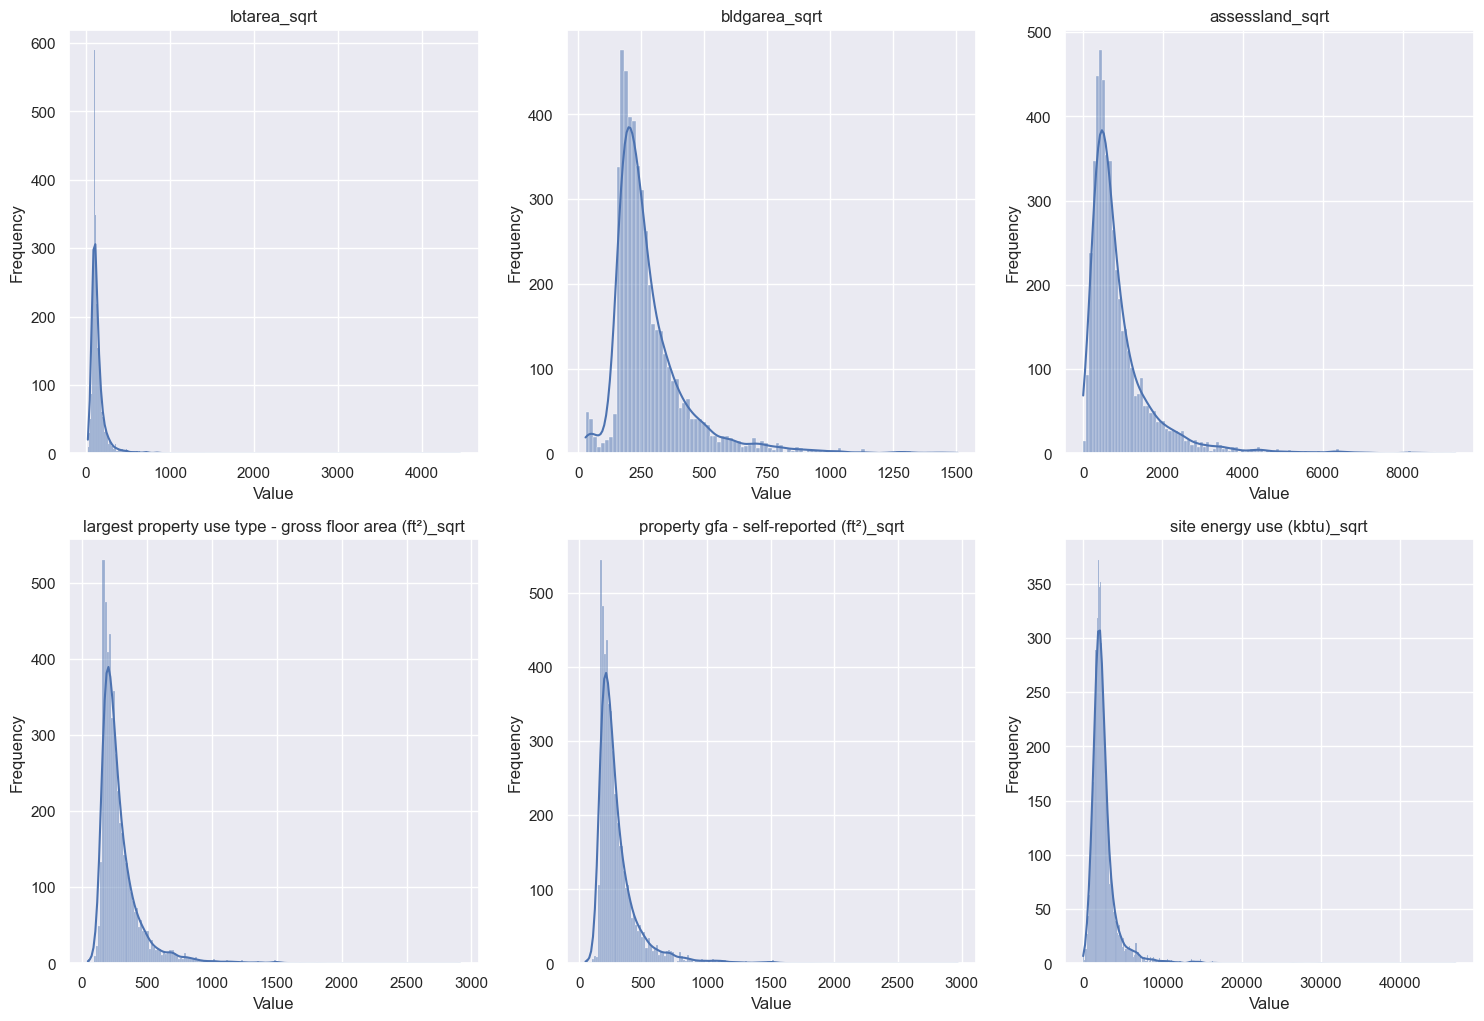

In [253]:
# Function to create 3x3 grid of histograms for columns ending with a specific suffix
def plot_transformed_columns_3x3(df, suffix):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()  # Flatten the 3x3 matrix of axes

    # Filter columns that end with the specified suffix
    columns_to_plot = [col for col in df.columns if col.endswith(suffix)]

    # Adjust the number of plots based on the number of columns
    num_plots = min(len(columns_to_plot), 9)

    for i in range(num_plots):
        col = columns_to_plot[i]
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'{col}')
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')

    # Hide any empty subplots
    for j in range(num_plots, 9):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Visualize the columns ending with '_log' in df_e_lt
plot_transformed_columns_3x3(df_e_lt, '_log')

plot_transformed_columns_3x3(df_e_srt, '_sqrt')

In [254]:
#visualizing the distribution 

import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


# Function to create a Q-Q plot
def qq_plot(data, title):
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(title)
    plt.show()

# selecting column
column = 'largest property use type - gross floor area (ft²)_log'

# Histogram and Q-Q plot for Log Transformation
sns.histplot(df_e_lt[column], kde=True)
plt.title('Histogram - Log Transformation')
plt.show()

qq_plot(df_e_lt[column], 'Q-Q Plot - Log Transformation')



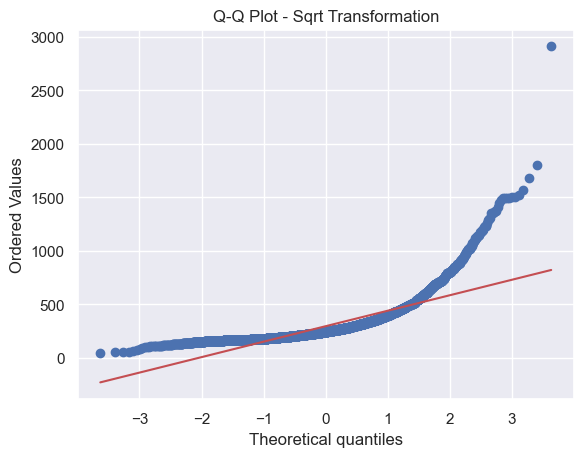

In [255]:
column = 'largest property use type - gross floor area (ft²)_sqrt'
qq_plot(df_e_srt[column], 'Q-Q Plot - Sqrt Transformation')

In [256]:
# As we can see, the distribution above is not so normal 


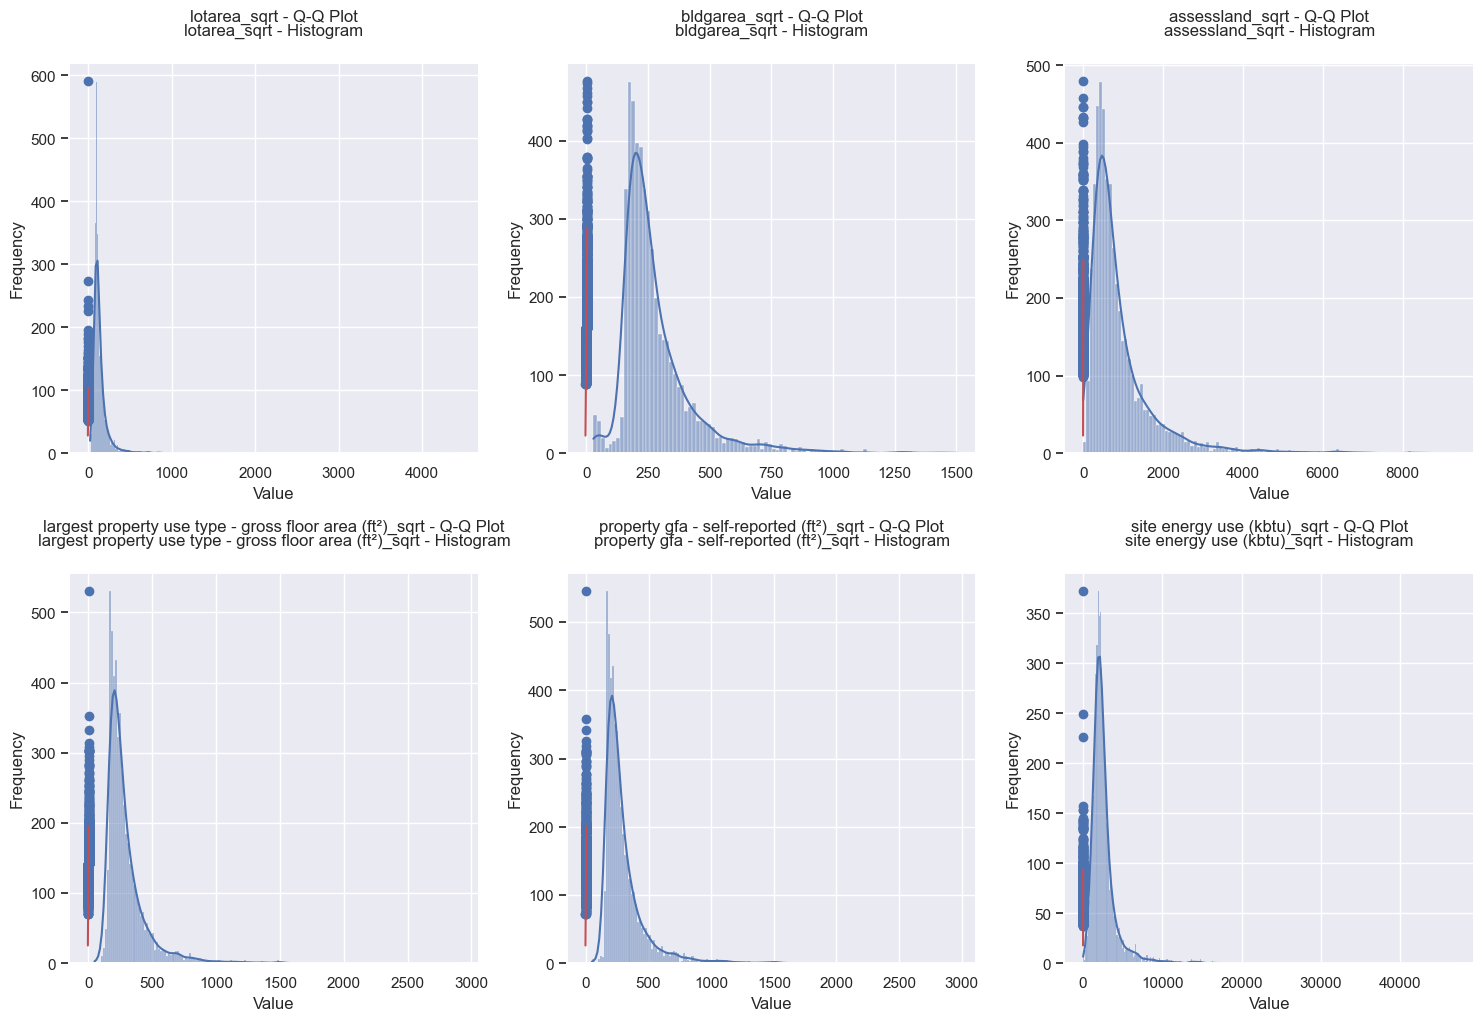

In [257]:

# Function to create 3x3 grid of histograms and Q-Q plots for columns ending with a specific suffix
def plot_transformed_columns_3x3(df, suffix):
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    axes = axes.flatten()  # Flatten the 3x3 matrix of axes

    # Filter columns that end with the specified suffix
    columns_to_plot = [col for col in df.columns if col.endswith(suffix)]

    # Adjust the number of plots based on the number of columns
    num_plots = min(len(columns_to_plot), 9)

    for i in range(num_plots):
        col = columns_to_plot[i]

        # Plot Histogram
        sns.histplot(df[col], ax=axes[i], kde=True)
        axes[i].set_title(f'{col} - Histogram', pad=20)  # Adjust the pad parameter for space
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')

        # Plot Q-Q Plot
        qq_axes = axes[i].twinx()  # Create a twin Axes sharing the x-axis
        qq_axes.yaxis.set_visible(False)  # Hide the y-axis for Q-Q plot
        stats.probplot(df[col], dist="norm", plot=qq_axes)
        qq_axes.set_title(f'{col} - Q-Q Plot', pad=30)  # Adjust the pad parameter for space

    # Hide any empty subplots
    for j in range(num_plots, 9):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

# Visualize the columns ending with '_log' in df_e_lt
plot_transformed_columns_3x3(df_e_lt, '_log')
plot_transformed_columns_3x3(df_e_srt, '_sqrt')

In [258]:

# Set the aesthetic style of the plots
sns.set()

# Select only numerical columns for plotting
numerical_columns = df_e_lt.select_dtypes(include=[np.number]).columns

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()  # Flatten the 3x3 matrix of axes

# Plot boxplots in the grid
for i, col in enumerate(numerical_columns):
    if i < 9:  # Ensure we don't go beyond 9 plots
        sns.boxplot(x=df_e_lt[col], ax=axes[i])
        axes[i].set_title(col)
    else:
        break  # Break the loop if there are more than 9 columns

# Hide any unused subplots
for j in range(i, 9):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

In [259]:
#sns.pairplot(df_e_lt)

In [260]:
df_e_lt_numeric = df_e_lt.select_dtypes(include=['float64', 'int64'])


In [261]:
#sns.pairplot(df_e_lt_numeric)

In [262]:
#selecting columns to plot
columns_to_plot = [
    'lotarea_log',
    'bldgarea_log',
    
    'assessland_log',
    'site energy use (kbtu)_log','largest property use type - gross floor area (ft²)_log',
     'property gfa - self-reported (ft²)_log' 
]

In [263]:
import seaborn as sns


# Create a pairplot and assign it to pair_plot
plot = sns.pairplot(df_e_lt[columns_to_plot])

# Adjust label sizes in the pairplot
for ax in plot.axes.flatten():
    # Adjust x-axis label font size
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10)
    # Adjust y-axis label font size
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10)

plt.show()

In [264]:
df_e_lt_numeric.corr()

numbldgs  numfloors  \
numbldgs                                            1.000000  -0.052562   
numfloors                                          -0.052562   1.000000   
unitstotal                                          0.101417   0.370330   
year built                                          0.007936   0.204473   
number of buildings                                 0.420387  -0.024017   
occupancy                                           0.007590  -0.077043   
lotarea_log                                         0.238638   0.057806   
bldgarea_log                                        0.089257   0.600341   
assessland_log                                      0.083378   0.552852   
largest property use type - gross floor area (f...  0.092517   0.606175   
property gfa - self-reported (ft²)_log              0.091183   0.609167   
site energy use (kbtu)_log                          0.084049   0.467996   

                                                    unitstotal  year built  \
numbldgs                                              0.101417    0.007936   
numfloors                                             0.370330    0.204473   
unitstotal                                            1.000000    0.131657   
year built                                            0.131657    1.000000   
number of buildings                                   0.042010    0.004064   
occupancy                                             0.052363   -0.054054   
lotarea_log                                           0.309711    0.241853   
bldgarea_log                                          0.434684    0.158272   
assessland_log                                        0.257657    0.171347   
largest property use type - gross floor area (f...    0.452757    0.175999   
property gfa - self-reported (ft²)_log                0.444853    0.178904   
site energy use (kbtu)_log                            0.358492    0.106588   

                                                    number of buildings  \
numbldgs                                                       0.420387   
numfloors                                                     -0.024017   
unitstotal                                                     0.042010   
year built                                                     0.004064   
number of buildings                                            1.000000   
occupancy                                                      0.002886   
lotarea_log                                                    0.100429   
bldgarea_log                                                   0.035873   
assessland_log                                                 0.029992   
largest property use type - gross floor area (f...             0.070587   
property gfa - self-reported (ft²)_log                         0.069632   
site energy use (kbtu)_log                                     0.057123   

                                                    occupancy  lotarea_log  \
numbldgs                                             0.007590     0.238638   
numfloors                                           -0.077043     0.057806   
unitstotal                                           0.052363     0.309711   
year built                                          -0.054054     0.241853   
number of buildings                                  0.002886     0.100429   
occupancy                                            1.000000     0.009595   
lotarea_log                                          0.009595     1.000000   
bldgarea_log                                        -0.034169     0.622582   
assessland_log                                      -0.136619     0.431483   
largest property use type - gross floor area (f...  -0.034498     0.499521   
property gfa - self-reported (ft²)_log              -0.043195     0.502900   
site energy use (kbtu)_log                           0.025320     0.418707   

                                                    bldgarea_log  \
nu

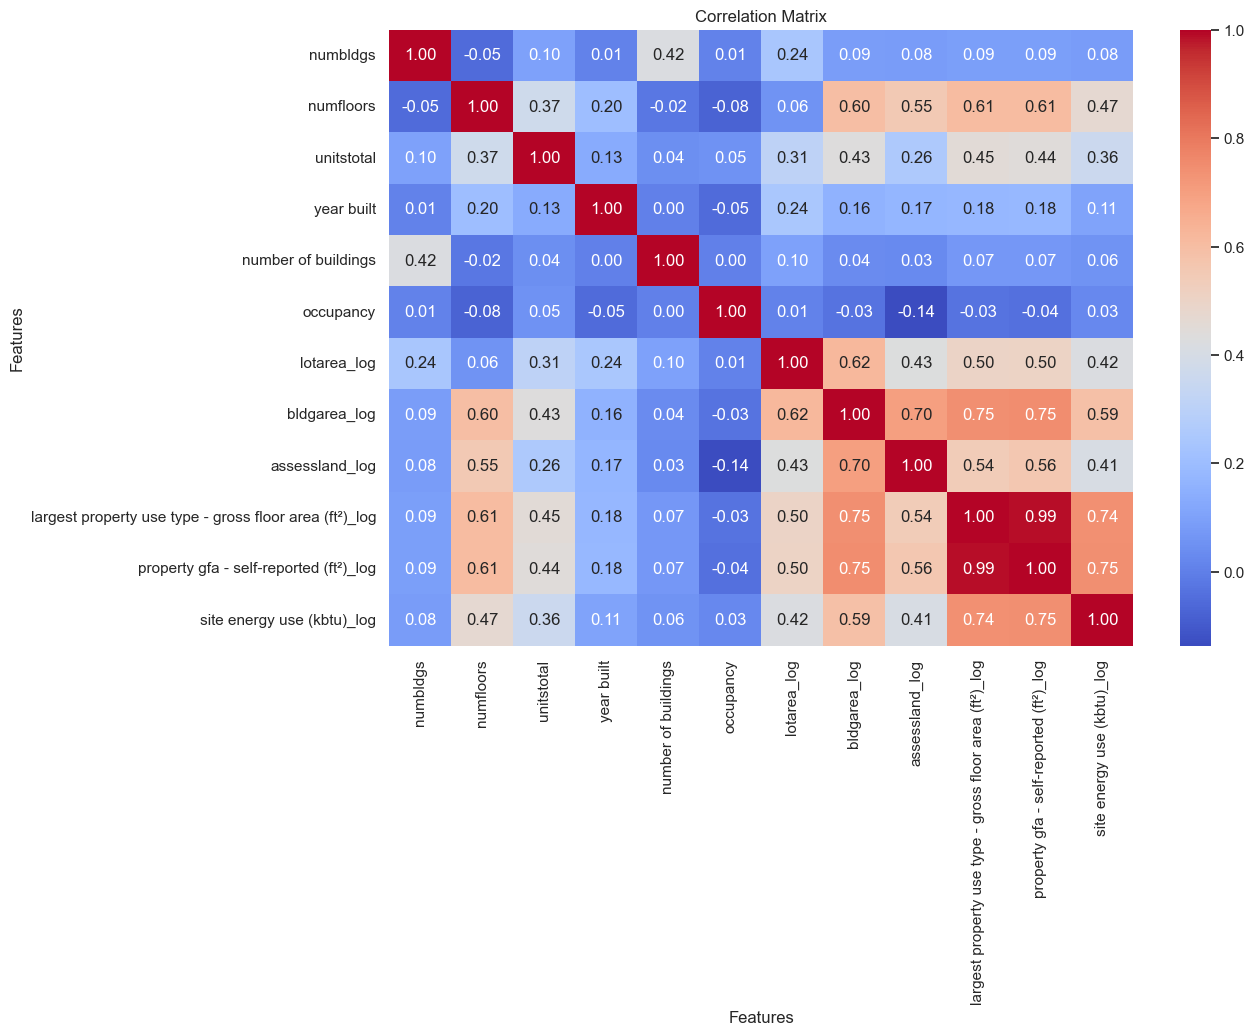

In [265]:
columns_to_plot = [
    'lotarea_log',
    'bldgarea_log','numbldgs','numfloors',
    
    'assessland_log',
    'site energy use (kbtu)_log','largest property use type - gross floor area (ft²)_log',
    'property gfa - self-reported (ft²)_log' 
]
# 'total (location-based) ghg emissions (metric tons co2e)_log',
# Set the size of the figure
plt.figure(figsize=(12, 8))
#corr_matrix = (df_e_lt[columns_to_plot]).corr()
corr_matrix = df_e_lt_numeric.corr()
# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add title and labels
plt.title('Correlation Matrix')
plt.xlabel('Features')
plt.ylabel('Features')

# Show the plot
plt.show()


In [266]:
df_e_lt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4910 entries, 0 to 9721
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   borough_x                                               4910 non-null   object 
 1   numbldgs                                                4910 non-null   float64
 2   numfloors                                               4910 non-null   float64
 3   unitstotal                                              4910 non-null   float64
 4   postal code                                             4910 non-null   object 
 5   year built                                              4910 non-null   int64  
 6   construction status                                     4910 non-null   object 
 7   number of buildings                                     4910 non-null   int64  
 8   occupancy                                  

In [267]:
df_e_lt.isna().sum()

borough_x                                                 0
numbldgs                                                  0
numfloors                                                 0
unitstotal                                                0
postal code                                               0
year built                                                0
construction status                                       0
number of buildings                                       0
occupancy                                                 0
lotarea_log                                               0
bldgarea_log                                              0
assessland_log                                            0
largest property use type - gross floor area (ft²)_log    0
property gfa - self-reported (ft²)_log                    0
site energy use (kbtu)_log                                0
dtype: int64

In [268]:
#pip install geopandas

In [269]:
#pip install fiona shapely descartes

In [270]:
df_e_lt= df_e_lt.dropna()

In [271]:
df_e_lt.shape

(4910, 15)

In [272]:
# Splitting the data
target_energy_efficiency = 'site energy use (kbtu)_log'

#X_e = df_e_c_dropped.select_dtypes(exclude=['object'])
X = df_e_lt.drop('site energy use (kbtu)_log',axis=1)

y = df_e_lt[target_energy_efficiency]

y.shape, X.shape

((4910,), (4910, 14))

In [273]:
#Performing train test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.25, random_state=42)

In [274]:
print(X_train.columns)


Index(['borough_x', 'numbldgs', 'numfloors', 'unitstotal', 'postal code',
       'year built', 'construction status', 'number of buildings', 'occupancy',
       'lotarea_log', 'bldgarea_log', 'assessland_log',
       'largest property use type - gross floor area (ft²)_log',
       'property gfa - self-reported (ft²)_log'],
      dtype='object')


In [275]:
# Create a list of categorical column names
cat = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
cat

['borough_x', 'postal code', 'construction status']

In [276]:
cat = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
cat_exception = [''] #postal code
cat_up = [col for col in cat if col not in cat_exception]
cat_up 

['borough_x', 'postal code', 'construction status']

In [277]:
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

# Instantiate transformers

ohe = OneHotEncoder(drop='first', sparse=False,handle_unknown='ignore')


In [278]:
# Transform the categorical columns
X_train_encoded = ohe.fit_transform(X_train[cat_up])
X_test_encoded = ohe.transform(X_test[cat_up])

# Convert the transformed array back into a DataFrame
X_train_encoded_df = pd.DataFrame(X_train_encoded, 
                                  columns=ohe.get_feature_names_out(cat_up), 
                                  index=X_train.index)

# Drop the original categorical columns from X_train
X_train.drop(columns=cat_up, inplace=True)

# Concatenate the remaining columns of X_train with the new one-hot encoded columns
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)


/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [279]:
# Transform the categorical columns in X_test using the already fitted ohe
X_test_encoded = ohe.transform(X_test[cat_up])

# Convert the transformed array back into a DataFrame
X_test_encoded_df = pd.DataFrame(X_test_encoded, 
                                 columns=ohe.get_feature_names_out(cat_up), 
                                 index=X_test.index)

# Drop the original categorical columns from X_test
X_test.drop(columns=cat_up, inplace=True)

# Concatenate the remaining columns of X_test with the new one-hot encoded columns
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)


/Users/DonJuve/anaconda3/envs/capstone/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:227: UserWarning: Found unknown categories in columns [1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [280]:
X_train.shape, y_train.shape

((3682, 197), (3682,))

In [281]:
X_test.shape

(1228, 197)

In [181]:
df_e_lt.isna().sum()

borough_x                                                 0
numbldgs                                                  0
numfloors                                                 0
unitstotal                                                0
postal code                                               0
year built                                                0
construction status                                       0
number of buildings                                       0
occupancy                                                 0
lotarea_log                                               0
bldgarea_log                                              0
assessland_log                                            0
largest property use type - gross floor area (ft²)_log    0
property gfa - self-reported (ft²)_log                    0
site energy use (kbtu)_log                                0
dtype: int64

In [182]:
df_e_lt.shape

(4910, 15)

In [183]:
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
#X_train_e_sc = scaler.fit_transform(X_train_e)
#X_test_e_sc = scaler.transform(X_test_e)


In [184]:
X_train.shape, 

((3682, 197),)

## Model with Linear Regression 

In [185]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression(n_jobs=50)
#model_energy.fit(X_train_e_sc, y_train_e)
lr_model.fit(X_train, y_train)

# Make predictions and evaluate the model 
y_pred_lr = lr_model.predict(X_train)
mse_e_lr = mean_squared_error(y_train, y_pred_lr)

#crossvalidation score
mse_scores_lr = -(cross_val_score(lr_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_scores_lr_mean =mse_scores_lr.mean()
rsquared_lr = lr_model.score(X_train, y_train)
accuracy_lr = cross_val_score(lr_model, X_train,y_train).mean()

print("=== Linear Regression MODEL SUMMARY==")
print("Mean Squared Error for Energy Efficiency model:", mse_e_lr)
print("R-Squared", rsquared_lr) #explain variation in the target
print("Mean MSE:-cross val ", mse_scores_lr_mean)
print("Model accuracy",accuracy_lr)

=== Linear Regression MODEL SUMMARY==
Mean Squared Error for Energy Efficiency model: 0.5426093254665871
R-Squared 0.5708337295492597
Mean MSE:-cross val  0.6127020888775669
Model accuracy -3.551128313188012e+17


In [186]:
from sklearn.linear_model import Ridge


# Initialize and train the Ridge Regression model with L2 regularization
ridge_model = Ridge(alpha=0.01)  
ridge_model.fit(X_train, y_train)

# Make predictions and evaluate the model 
y_pred_ridge = ridge_model.predict(X_train)
mse_e_ridge = mean_squared_error(y_train, y_pred_ridge)

# Cross-validation score
mse_scores_ridge = -(cross_val_score(ridge_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_scores_ridge_mean = mse_scores_ridge.mean()
rsquared_ridge = ridge_model.score(X_train, y_train)
accuracy_ridge = cross_val_score(ridge_model, X_train, y_train).mean()

print("=== Ridge Regression MODEL SUMMARY==")
print("Mean Squared Error for Energy Efficiency model:", mse_e_ridge)
print("R-Squared:", rsquared_ridge)  # Explains variation in the target
print("Mean MSE - Cross Val:", mse_scores_ridge_mean)
print("Model accuracy:", accuracy_ridge)


=== Ridge Regression MODEL SUMMARY==
Mean Squared Error for Energy Efficiency model: 0.5426100970811064
R-Squared: 0.5708331192557946
Mean MSE - Cross Val: 0.6122980789365794
Model accuracy: 0.5318725653246072


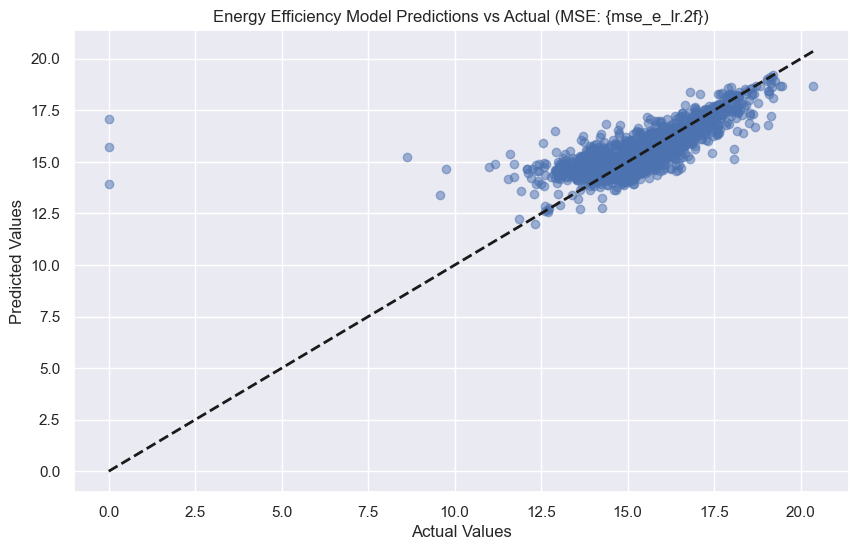

In [187]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_lr, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)  # Diagonal line for reference
plt.title('Energy Efficiency Model Predictions vs Actual (MSE: {mse_e_lr.2f})')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()


In [188]:
# Get feature names
feature_names = X_train.columns

# Get coefficients
coefficients = lr_model.coef_

# Lets create a DataFrame from the features
feature_importance = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])

# Sort the features by their absolute coefficients
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Display the feature importances
feature_importance

Coefficient  Absolute Coefficient
postal code_11426                         -3.002645              3.002645
postal code_10020                         -2.262061              2.262061
postal code_11249                         -1.907527              1.907527
postal code_10475                         -1.378432              1.378432
property gfa - self-reported (ft²)_log     0.879544              0.879544
...                                             ...                   ...
year built                                -0.001026              0.001026
numbldgs                                  -0.000418              0.000418
postal code_11215                         -0.000382              0.000382
unitstotal                                 0.000188              0.000188
number of buildings                       -0.000051              0.000051

[197 rows x 2 columns]

## Model with Random Forest Regressor

In [189]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=4) # max_depth=4, min_samples_leaf=5, min_samples_split=4
#Fitting the model 
rf_model.fit(X_train, y_train)

#calculate y_pred_rf on train

y_pred_train_rf = rf_model.predict(X_train)
mse_e_rf = mean_squared_error(y_train, y_pred_train_rf)
#Cross validation 
mse_scores_rf = -(cross_val_score(rf_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))


mse_scores_rf = -(cross_val_score(rf_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_scores_rf_mean =mse_scores_rf.mean()
rsquared_rf = r2_score(y_train, y_pred_train_rf)
accuracy_rf = cross_val_score(rf_model, X_train,y_train).mean()

print("===Random Forest Regressor MODEL SUMMARY==")
print("Mean Squared Error for RF model:", mse_e_rf)
print("R-Squared", rsquared_lr) #explain variation in the target
print("Mean MSE:-cross val ", mse_scores_rf_mean)
print("Model accuracy",accuracy_rf)

===Random Forest Regressor MODEL SUMMARY==
Mean Squared Error for RF model: 0.45444635480878265
R-Squared 0.5708337295492597
Mean MSE:-cross val  0.5899770769588938
Model accuracy 0.5445548254242137


In [190]:
##### Using Grid search to look for the best parameters

param_grid = {
    'max_depth': [4, 5,6],
    'min_samples_leaf': [3,4,5],
    'min_samples_split':[2,4,6],
}

rf_model = DecisionTreeRegressor()

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 6}
Best cross-validated accuracy: -0.69


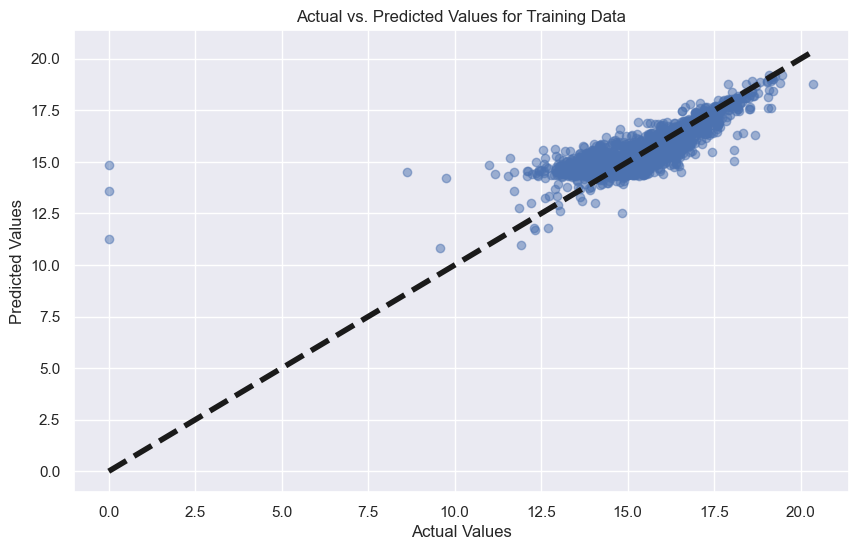

In [191]:
import matplotlib.pyplot as plt

# Actual vs. Predicted scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train_rf, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)  # Diagonal line
plt.show()

## Model with Decision Tree Regressor

In [192]:
#instantiation 
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=1, min_samples_split=4,max_features=50,random_state=42)
#fitting the model 
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features=50, min_samples_split=4,
                      random_state=42)

In [193]:

#calculate y_pred_rf on train

y_pred_train_dt = dt_model.predict(X_train)

#Cross validation 
mse_scores = -(cross_val_score(dt_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))


mse_e_dt = mean_squared_error(y_train, y_pred_train_dt)
#Cross validation 
mse_scores_dt = -(cross_val_score(rf_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))


mse_scores_dt = -(cross_val_score(dt_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_scores_dt_mean =mse_scores_dt.mean()
rsquared_dt = r2_score(y_train, y_pred_train_dt)
accuracy_dt = cross_val_score(dt_model, X_train,y_train).mean()

# Calculate and print metrics on training set
print("===Decision Tree Regressor MODEL SUMMARY==")
print("Mean Squared Error Training:",mse_scores_dt_mean)
print("R-squared  Training:", rsquared_dt)
print("Mean Squared average:/ Crossval", mse_scores_dt_mean)
print("Model accuracy",accuracy_dt)


===Decision Tree Regressor MODEL SUMMARY==
Mean Squared Error Training: 0.9410072112418891
R-squared  Training: 0.7355702673055637
Mean Squared average:/ Crossval 0.9410072112418891
Model accuracy 0.3003857202566181


In [194]:
# Get feature names
feature_names = X_train.columns

# Get feature importances from the decision tree model
importances = dt_model.feature_importances_

# Create a DataFrame from the features and importances
feature_importance = pd.DataFrame(importances, index=feature_names, columns=['Importance'])

# Sort the features by their importances
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the feature importances
feature_importance

Importance
largest property use type - gross floor area (f...    0.541962
property gfa - self-reported (ft²)_log                0.174297
bldgarea_log                                          0.091958
postal code_10003                                     0.044083
number of buildings                                   0.034994
...                                                        ...
postal code_10432                                     0.000000
postal code_10451                                     0.000000
postal code_10452                                     0.000000
postal code_10453                                     0.000000
postal code_11694                                     0.000000

[197 rows x 1 columns]

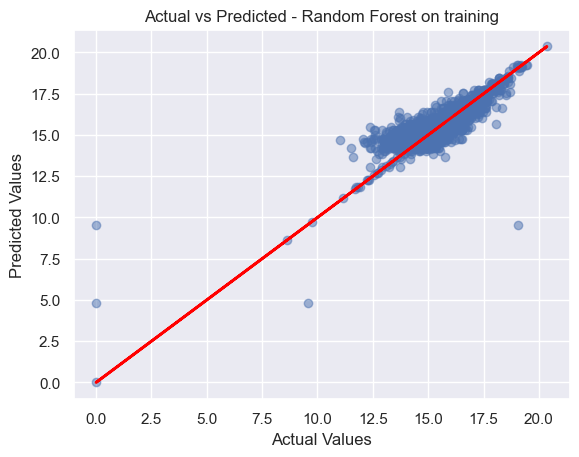

In [195]:
#Visualizing Predictions
import matplotlib.pyplot as plt
y_pred_train_dt = dt_model.predict(X_train)

plt.scatter(y_train, y_pred_train_dt, alpha=0.5)

# Line for perfect predictions
plt.plot(y_train, y_train, color='red', linewidth=2) 

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Random Forest on training")

plt.show()

In [196]:
#Using Grid search to look for the best parameters

param_grid = {
    'max_depth': [2, 4, 8],
    'min_samples_leaf': [1,2,3],
    'min_samples_split':[4,6,8],
}

dt_model = DecisionTreeRegressor()

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best cross-validated accuracy: -0.70


## Model with Gradient Descent XGboost


In [197]:
#pip install xgboost

In [198]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3682 entries, 1378 to 1030
Columns: 197 entries, numbldgs to postal code_11694
dtypes: float64(194), int64(3)
memory usage: 5.6 MB


In [199]:
#X_train=X_train.drop('postal code')
X_train = X_train.reset_index(drop=True)
X_train

numbldgs  numfloors  unitstotal  year built  number of buildings  \
0          1.0        7.0       126.0        2020                    1   
1          1.0       10.0        19.0        2009                    1   
2          2.0        5.0         2.0        2017                    1   
3          1.0        5.0        36.0        1926                    1   
4          1.0        3.0        12.0        2014                    1   
...        ...        ...         ...         ...                  ...   
3677       1.0        8.0        56.0        2009                    1   
3678       1.0       42.0        16.0        1967                    1   
3679       1.0        8.0        95.0        1937                    1   
3680       1.0        5.0        36.0        1919                    1   
3681       1.0       12.0       115.0        2006                    1   

      occupancy  lotarea_log  bldgarea_log  assessland_log  \
0           100    10.308986     11.990420       13.892473   
1           100     8.730044     10.876744       13.156767   
2           100     8.853808     10.279215       12.083063   
3           100     8.744329     10.236418       12.276769   
4            90     9.579902     10.288206       13.280906   
...         ...          ...           ...             ...   
3677        100     9.346880     10.875818       13.558738   
3678         90    10.600801     13.854041       14.484647   
3679         95     9.820758     11.771868       11.677601   
3680        100     8.899867     10.385945       11.318746   
3681        100    10.397970     12.146020       13.017003   

      largest property use type - gross floor area (ft²)_log  ...  \
0                                             12.249118       ...   
1                                             10.778977       ...   
2                                             10.484809       ...   
3                                             10.236418       ...   
4                                              9.756842       ...   
...                                                 ...       ...   
3677                                          10.466583       ...   
3678                                          13.686696       ...   
3679                                          11.771868       ...   
3680                                          10.385945       ...   
3681                                          11.634577       ...   

      postal code_11429  postal code_11432  postal code_11433  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
...                 ...                ...                ...   
3677                0.0                0.0                0.0   
3678                0.0                0.0                0.0   
3679                0.0                0.0                0.0   
3680                0.0                0.0                0.0   
3681                0.0                0.0                0.0   

      postal code_11434  postal code_11435  postal code_11436  \
0                   0.0                0.0                0.0   
1                   0.0                0.0                0.0   
2                   0.0                0.0                0.0   
3                   0.0                0.0                0.0   
4                   0.0                0.0                0.0   
...                 ...                ...                ...   
3677                0.0                0.0                0.0   
3678                0.0                0.0                0.0   
3679                0.0                0.0                0.0   
3680                0.0                0.0                0.0   
3681                0.0                0.0     

In [200]:
import xgboost as xgb

# Create the XGBoost instance
xgb_model = xgb.XGBRegressor(n_estimators=10, learning_rate=0.1, max_depth=10) #n_estimators=10, learning_rate=0.1, max_depth=10
#'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 6




# Fit the model
xgb_model.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [201]:

#calculate y_pred_xgb on train

y_pred_train_xgb = xgb_model.predict(X_train)

#Cross validation 
mse_scores_xgb = -(cross_val_score(xgb_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
mse_scores_xgb_mean =mse_scores_xgb.mean()

mse_e_xgb = mean_squared_error(y_train, y_pred_train_xgb)



mse_scores_xgb = -(cross_val_score(xgb_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error'))
rsquared_xgb = r2_score(y_train, y_pred_train_xgb)
accuracy_xgb = cross_val_score(xgb_model, X_train,y_train).mean()

# Calculate and print metrics on training set
print("=== Gradient Descent XGBoost MODEL SUMMARY==")
print("Mean Squared Error Training:",mse_scores_xgb_mean)
print("R-squared  Training:", rsquared_xgb)
print("Mean Squared average:/ Crossval", mse_scores_xgb_mean)
print("Model accuracy",accuracy_dt)


=== Gradient Descent XGBoost MODEL SUMMARY==
Mean Squared Error Training: 0.6744406063952412
R-squared  Training: 0.6910577065568021
Mean Squared average:/ Crossval 0.6744406063952412
Model accuracy 0.3003857202566181


In [202]:
##PLOT BEST TREE (pp) AAND EXPLIN IN

In [203]:
#Using Grid search to look for the best parameters

param_grid = {
    'max_depth': [2, 4, 8],
    'min_samples_leaf': [1,2,3],
    'min_samples_split':[4,6,8],
}

xgb_model = DecisionTreeRegressor()

grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#Best parameters
print("Best parameters found: ", grid_search.best_params_)

#Best cross-validated score
print("Best cross-validated accuracy: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 8}
Best cross-validated accuracy: -0.70


## Baseline Models Summary 
'So far the linear Regression is our best model with the higest cross validation score'


''''
=== Linear Regression MODEL SUMMARY==
Mean Squared Error for Energy Efficiency model: 0.03378337559569033
R-Squared 0.968041818682259
Mean MSE:-cross val  2745772250922531.5
Model accuracy 0.9674890593752579

===Random Forest Regressor MODEL SUMMARY==
Mean Squared Error Training: 0.034340207025185754
R-squared  Training: 0.967515070852196
Mean Squared average:/ Crossval 0.05115722663194122
Mean MSE:-cross val  0.05115722663194122

===Decision Tree Regressor MODEL SUMMARY==
Mean Squared Error Training: 0.014024258826550916
R-squared  Training: 0.9867334214381165
Mean Squared average:/ Crossval 0.2052413055027733
Model accuracy 0.9192932718266695

=== Gradient Descent XGBoost MODEL SUMMARY==
Mean Squared Error Training: 0.16014945615962706
R-squared  Training: 0.8485028429622088
Mean Squared average:/ Crossval 0.19434603451401064
Model accuracy 0.8282779029186195
'''

In [204]:
## Best Model Evaluation on the test set

#calculate y_pred_rf  on test set
#y_pred_lr = lr_model.predict(X_test)

# Calculate and print metrics on test
#print("Mean Squared Error Test:", mean_squared_error(y_test, y_pred_lr))
#print("R-squared Test::", r2_score(y_test, y_pred_lr))
#print("model score:",lr_model.score(X_test,y_test))


Mean Squared Error Test: 0.42475935034165024
R-squared Test:: 0.6347001827656579
model score: 0.6347001827656579


In [205]:
##  Model 1 Summary 
print("=== Linear Regression MODEL SUMMARY==")
print("Mean Squared Error for Energy Efficiency model:", mse_e_lr)
print("R-Squared", rsquared_lr) #explain variation in the target
print("Mean MSE:-cross val ", mse_scores_lr_mean)
print("Model accuracy",accuracy_lr)
print("===Random Forest Regressor MODEL SUMMARY==")
print("Mean Squared Error for RF model:", mse_e_rf)
print("R-Squared", rsquared_lr) #explain variation in the target
print("Mean MSE:-cross val ", mse_scores_rf_mean)
print("Model accuracy",accuracy_rf)
print("===Decision Tree Regressor MODEL SUMMARY==")
print("Mean Squared Error Training:",mse_scores_dt_mean)
print("R-squared  Training:", rsquared_dt)
print("Mean Squared average:/ Crossval", mse_scores_dt_mean)
print("Model accuracy",accuracy_dt)
print("=== Gradient Descent XGBoost MODEL SUMMARY==")
print("Mean Squared Error Training:",mse_scores_xgb_mean)
print("R-squared  Training:", rsquared_xgb)
print("Mean Squared average:/ Crossval", mse_scores_xgb_mean)
print("Model accuracy",accuracy_dt)


=== Linear Regression MODEL SUMMARY==
Mean Squared Error for Energy Efficiency model: 0.5426093254665871
R-Squared 0.5708337295492597
Mean MSE:-cross val  0.6127020888775669
Model accuracy -3.551128313188012e+17
===Random Forest Regressor MODEL SUMMARY==
Mean Squared Error for RF model: 0.45444635480878265
R-Squared 0.5708337295492597
Mean MSE:-cross val  0.5899770769588938
Model accuracy 0.5445548254242137
===Decision Tree Regressor MODEL SUMMARY==
Mean Squared Error Training: 0.9410072112418891
R-squared  Training: 0.7355702673055637
Mean Squared average:/ Crossval 0.9410072112418891
Model accuracy 0.3003857202566181
=== Gradient Descent XGBoost MODEL SUMMARY==
Mean Squared Error Training: 0.6744406063952412
R-squared  Training: 0.6910577065568021
Mean Squared average:/ Crossval 0.6744406063952412
Model accuracy 0.3003857202566181
